In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retaildataset/stores data-set.csv
/kaggle/input/retaildataset/Features data set.csv
/kaggle/input/retaildataset/sales data-set.csv


In the retail dataset, we are given 3 different datasets:

* Stores dataset

* Features dataset

* Sales dataset

Let's initialize dataframes based on the data of each of the datasets.

In [2]:
stores_df = pd.read_csv('/kaggle/input/retaildataset/stores data-set.csv')
features_df = pd.read_csv('/kaggle/input/retaildataset/Features data set.csv')
sales_df = pd.read_csv('/kaggle/input/retaildataset/sales data-set.csv')

*From looking at the information provided about the datasets, a lot of the info is overlapping. For example (see below):*

In [6]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
stores_df.shape

(45, 3)

In [8]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
features_df.shape

(8190, 12)

In [10]:
sales_df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
5,1,1,12/03/2010,21043.39,False
6,1,1,19/03/2010,22136.64,False
7,1,1,26/03/2010,26229.21,False
8,1,1,02/04/2010,57258.43,False
9,1,1,09/04/2010,42960.91,False


In [11]:
sales_df.shape

(421570, 5)

Let us understand what exactly is happening in each dataset:

* In the stores dataset (stores_df), each individual store is analyzed; their size (sq ft?) and type of store (?) are given

* In the features dataset (features_df), each individual store is analyzed for a 182-week stretch; in each week, we are shown whether it is a holiday, what the temperature was, what the fuel price was,  and whether there were any promotional markdowns.

* In the sales dataset (sales_df), each individual store and each department within a store is analyzed for a 182-week stretch; in each week we are shown weekly sales, department, and whether it was a holiday or not.

**Our first goal is to predict department-wide sales for each store for the following year. How can we go about doing that? On a basic level, we want to:**

1. Understand the dynamics of the stores and sales through exploratory data analysis

2. Decide what is the best model to run for the data

First, let us understand the department-wide data.


In [12]:
sales_df.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

* It appears there are as many as 81 departments in stores; unsure if this is the case for each and every store. Of note, there are actually less weeks available for study than in the features dataset.

In [13]:
sales_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [22]:
sales_df['Date'].unique()

array(['05/02/2010', '12/02/2010', '19/02/2010', '26/02/2010',
       '05/03/2010', '12/03/2010', '19/03/2010', '26/03/2010',
       '02/04/2010', '09/04/2010', '16/04/2010', '23/04/2010',
       '30/04/2010', '07/05/2010', '14/05/2010', '21/05/2010',
       '28/05/2010', '04/06/2010', '11/06/2010', '18/06/2010',
       '25/06/2010', '02/07/2010', '09/07/2010', '16/07/2010',
       '23/07/2010', '30/07/2010', '06/08/2010', '13/08/2010',
       '20/08/2010', '27/08/2010', '03/09/2010', '10/09/2010',
       '17/09/2010', '24/09/2010', '01/10/2010', '08/10/2010',
       '15/10/2010', '22/10/2010', '29/10/2010', '05/11/2010',
       '12/11/2010', '19/11/2010', '26/11/2010', '03/12/2010',
       '10/12/2010', '17/12/2010', '24/12/2010', '31/12/2010',
       '07/01/2011', '14/01/2011', '21/01/2011', '28/01/2011',
       '04/02/2011', '11/02/2011', '18/02/2011', '25/02/2011',
       '04/03/2011', '11/03/2011', '18/03/2011', '25/03/2011',
       '01/04/2011', '08/04/2011', '15/04/2011', '22/04

Text(0, 0.5, 'Total Sales')

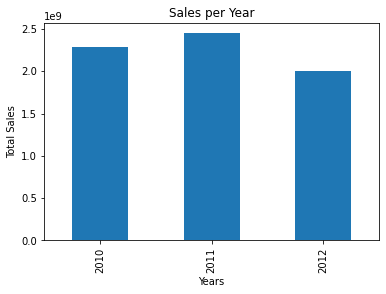

In [5]:
import matplotlib.pyplot as plt

def dept_allsales_in_yr(df, yr):
    count = 0
    for i in range(df.shape[0]):
        if yr in df.iloc[i]['Date']:
            count += df.iloc[i]['Weekly_Sales']
        else:
            continue
    return count

sales_per_year_df = pd.DataFrame({'sales_per_year':[dept_allsales_in_yr(sales_df, yr='2010'), dept_allsales_in_yr(sales_df, yr='2011'), dept_allsales_in_yr(sales_df, yr='2012')]}, index=['2010', '2011', '2012'])
sales_per_year_df['sales_per_year'].plot(kind='bar')
plt.title("Sales per Year")
plt.xlabel("Years")
plt.ylabel("Total Sales")

* 2011 did have the most sales per year, but not sure how much we can read from this, as both 2010 and 2012 have missing data around important times of the year; 2010 had data from January missing, 2012 had data from November and December missing. All around, there aren't huge differences.

* It is interesting to see the difference in even 2012 compared to 2010; it shows how much November and December play into retail sales.

* The question, how can the data we are given help us to predict department-wide sales for each store? First, we can analyze the department-wide sales, as we have only done all sales per year so far. 

* **Let's try it out on one department in one store.**

In [3]:
def how_many_unique_departments_in_the_store(df, store):
    lst = []
    for i in range(df.shape[0]):
        if df.iloc[i]['Store'] == store:
            if df.iloc[i]['Dept'] not in lst:
                lst.append(df.iloc[i]['Dept'])
            else:
                continue
        else:
            continue
    return(lst)
            

how_many_unique_departments_in_the_store(sales_df, store=40)

'''def sales_per_dept(df, store, dept):
    sales = 0
    lst = []
    for i in range(df.shape[0]):
        if df.iloc[i]['Store'] == store:
            if df.iloc[i]['Dept'] == dept:
                sales += df.iloc[i]['Weekly_Sales']
                lst.append(df.iloc[i]['Weekly_Sales'])
            else:
                continue
        else:
            continue
    print(sales)
    print(lst)
    
    
def sales_per_dept_per_year(df, store, dept, yr):
    sales = 0
    lst = []
    for i in range(df.shape[0]):
        if df.iloc[i]['Store'] == store:
            if df.iloc[i]['Dept'] == dept and yr in df.iloc[i]['Date']:
                sales += df.iloc[i]['Weekly_Sales']
                lst.append(df.iloc[i]['Weekly_Sales'])
            else:
                continue
        else:
            continue
    print(sales)
    #print(lst)
                
            
#sales_per_dept(sales_df, store=1, dept=1) 

sales_per_dept_per_year(sales_df, store=20, dept=81, yr='2012')'''

"def sales_per_dept(df, store, dept):\n    sales = 0\n    lst = []\n    for i in range(df.shape[0]):\n        if df.iloc[i]['Store'] == store:\n            if df.iloc[i]['Dept'] == dept:\n                sales += df.iloc[i]['Weekly_Sales']\n                lst.append(df.iloc[i]['Weekly_Sales'])\n            else:\n                continue\n        else:\n            continue\n    print(sales)\n    print(lst)\n    \n    \ndef sales_per_dept_per_year(df, store, dept, yr):\n    sales = 0\n    lst = []\n    for i in range(df.shape[0]):\n        if df.iloc[i]['Store'] == store:\n            if df.iloc[i]['Dept'] == dept and yr in df.iloc[i]['Date']:\n                sales += df.iloc[i]['Weekly_Sales']\n                lst.append(df.iloc[i]['Weekly_Sales'])\n            else:\n                continue\n        else:\n            continue\n    print(sales)\n    #print(lst)\n                \n            \n#sales_per_dept(sales_df, store=1, dept=1) \n\nsales_per_dept_per_year(sales_df, store=2

In [4]:
df_store1 = sales_df[(sales_df['Store'] == 1)]
#df_store1_dept1 = df_store1_dept1[(df_store1_dept1['Dept'] == '1')]

In [5]:
df_store1_dept1 = df_store1[df_store1['Dept'] == 1]

In [33]:
df_store1_dept1.shape

(143, 5)

* We have created df_store1_dept1, which is a dataframe over the 143 weeks modelled in the original sales dataframe.

In [42]:
df_store1_dept1.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [6]:
df_store1_dept1['Date']= pd.to_datetime(df_store1_dept1['Date'])
df_store1_dept1 = df_store1_dept1.set_index('Date') 
df_store1_dept1 = df_store1_dept1.sort_index()
df_store1_dept1.head(60)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-01-10,1,1,20094.19,False
2010-02-04,1,1,57258.43,False
2010-02-07,1,1,16333.14,False
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-09,1,1,16241.78,False
2010-03-12,1,1,22517.56,False
2010-03-19,1,1,22136.64,False
2010-03-26,1,1,26229.21,False


In [21]:
df_store1_dept1.index[0]

Timestamp('2010-01-10 00:00:00')

*** Year to year recordings of data is weird; for instance in 2010, there is only 1 listing in January, but 6 listings in 2011, which leads to close to 90,000 in sales recorded for 2011 January sales, as opposed to 20,000 for 2010 January sales...something to note.**

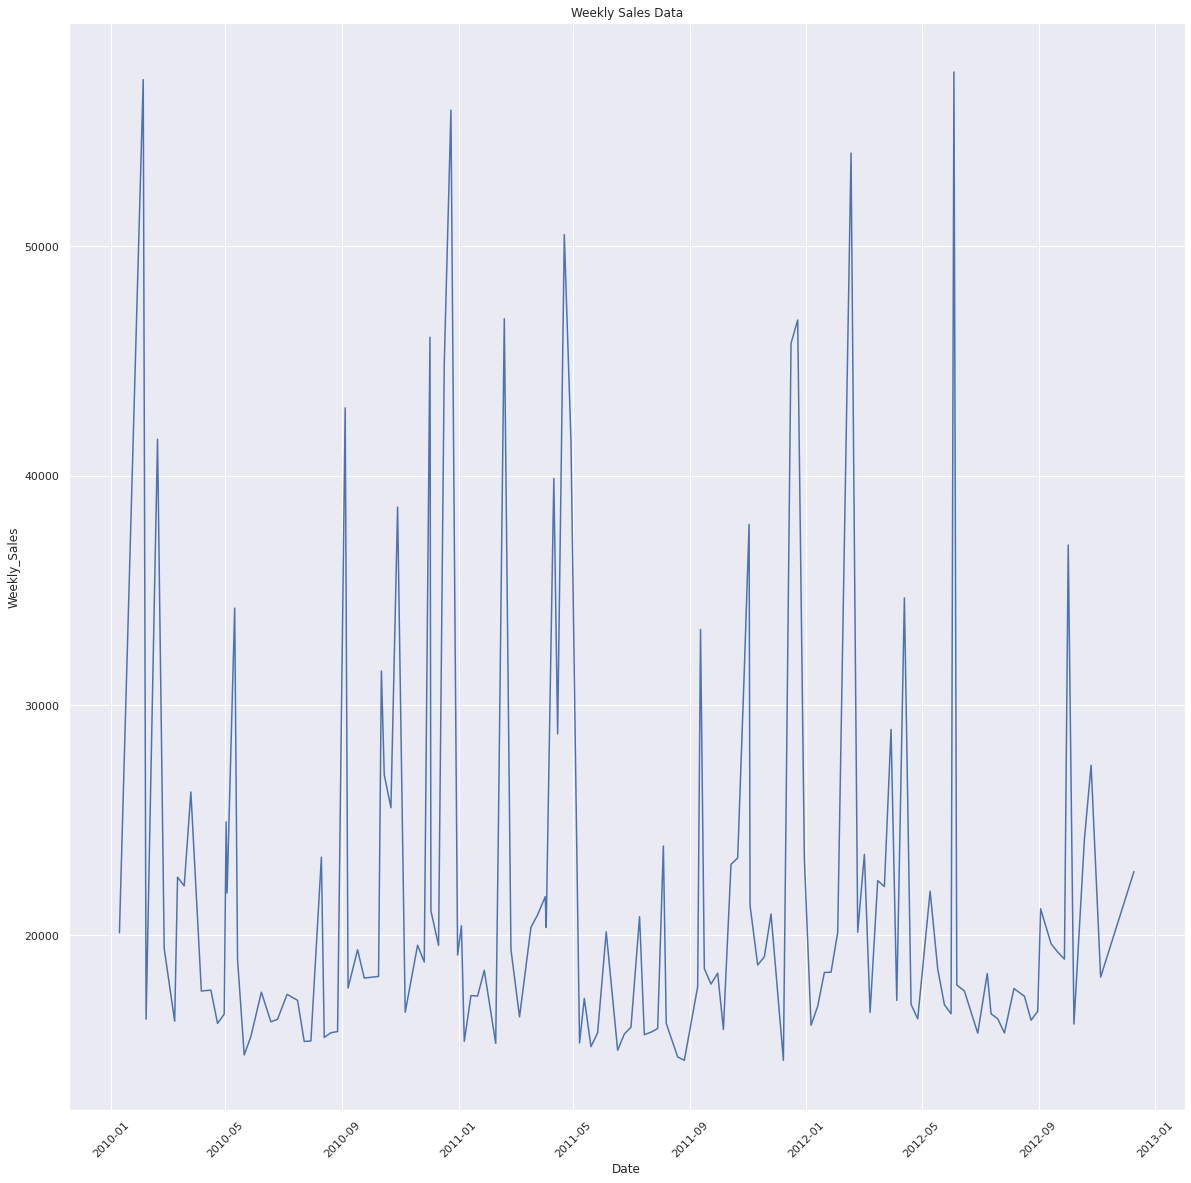

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


plt.figure(figsize=(20, 20))
plt.ylabel('Weekly_Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Weekly Sales Data')

plt.plot(df_store1_dept1['Weekly_Sales'])
#plt.gcf().autofmt_xdate()
plt.show()

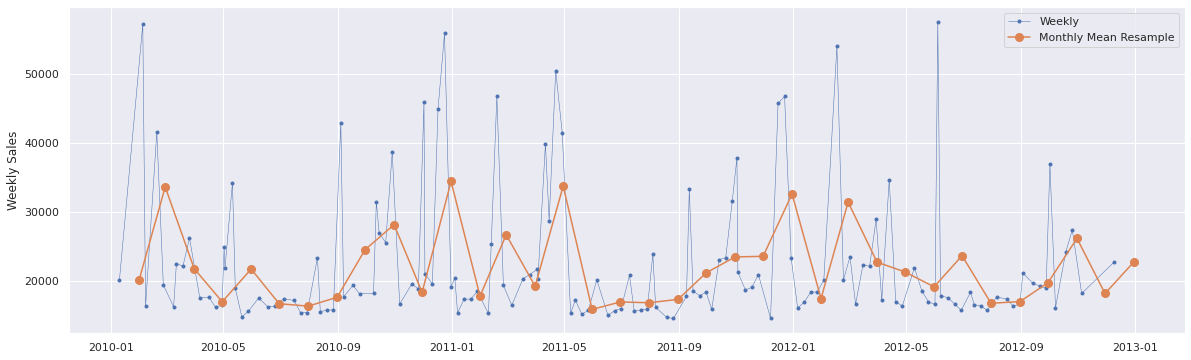

In [10]:
import warnings
import matplotlib.pyplot as plt
y = df_store1_dept1['Weekly_Sales']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Weekly Sales')
ax.legend();

* Obviously, there are spikes; but outside of the spikes, nothing seems out of the ordinary and the overall trend actually appears flat. Can we find out if the spikes are due to holidays, or something seasonal?

In [10]:
df_store1_dept1.describe()

,Store,Dept,Weekly_Sales
count,143.0,143.0,143.000000
mean,1.0,1.0,22513.322937
std,0.0,0.0,9854.349032
min,1.0,1.0,14537.370000
25%,1.0,1.0,16494.630000
50%,1.0,1.0,18535.480000
75%,1.0,1.0,23214.215000
max,1.0,1.0,57592.120000


* It appears $23,000 is the 75th quartile, or the upper level before outliers; can we find out the percentage of dates above this amount?

In [11]:
spike_df = df_store1_dept1[df_store1_dept1['Weekly_Sales'] > 23000]

In [13]:
spike_df.shape

(37, 5)

* 1/4th of the total weeks studies are spike weeks; what month are they most prevalent in?

In [14]:
spike_df['month'] = pd.DatetimeIndex(spike_df['Date']).month

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
spike_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,month
0,1,1,2010-05-02,24924.50,False,5
1,1,1,2010-12-02,46039.49,True,12
2,1,1,2010-02-19,41595.55,False,2
7,1,1,2010-03-26,26229.21,False,3
8,1,1,2010-02-04,57258.43,False,2


array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

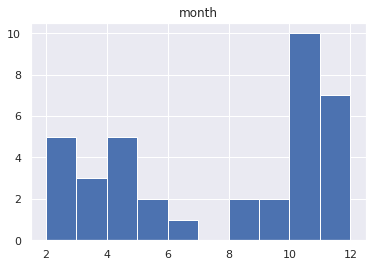

In [17]:
spike_df.hist(column='month')

<AxesSubplot:>

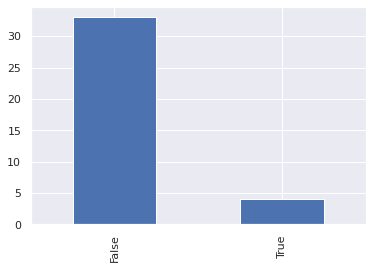

In [28]:
spike_df.IsHoliday.value_counts().plot.bar()

* Interestingly, there are no instances of outlier months in January and July.

* November is very easily the month with the most instances of "outlier" months, or months with outsized sales, followed by     December. This is the obvious result of holiday seasons. Even though these weeks do not necessarily alays include holidays,   as depicted above, the outsized sales in November and December represent lead-up demand (also should be noted 2012 data does   not include the holiday season). February and May follow these holiday seasons, which may have to do with Valentine's Day,   leading into summer?

* What about the slow months?

In [21]:
fall_df = df_store1_dept1[df_store1_dept1['Weekly_Sales'] < 16500]

In [22]:
fall_df.shape

(36, 5)

In [23]:
fall_df['month'] = pd.DatetimeIndex(fall_df['Date']).month

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
fall_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,month
11,1,1,2010-04-23,16145.35,False,4
15,1,1,2010-05-21,14773.04,False,5
16,1,1,2010-05-28,15580.43,False,5
19,1,1,2010-06-18,16216.27,False,6
20,1,1,2010-06-25,16328.72,False,6


array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

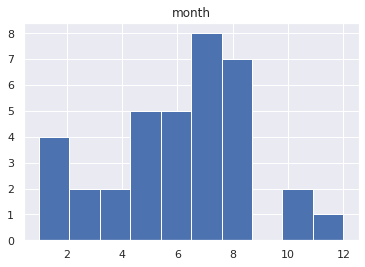

In [29]:
fall_df.hist(column='month')

<AxesSubplot:>

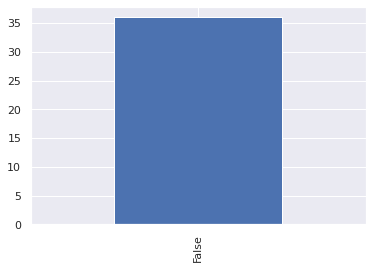

In [30]:
fall_df.IsHoliday.value_counts().plot.bar()

* Interestingly, there are no instances of outlier months in September. Most of the data appears to be within the summer     months.

* Unsurprisingly, as well as definitively, there are ZERO instances of holiday weeks in this low sales figure data.

* Let us further analyze the data and its trends in two steps: (1) Decomposing the data, and (2) Checking the data for stationarity, as derived from https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one and https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-two/.


**Decomposing Data**

By looking at the graph of sales data above, we can see a generally trend with hints of seasonal or cyclical changes. The next step is to decompose the data to view more of the complexity behind the linear visualization. A useful Python function called seasonal_decompose within the 'statsmodels' package can help us to decompose the data into four different components:

* Observed
* Trended
* Seasonal
* Residual

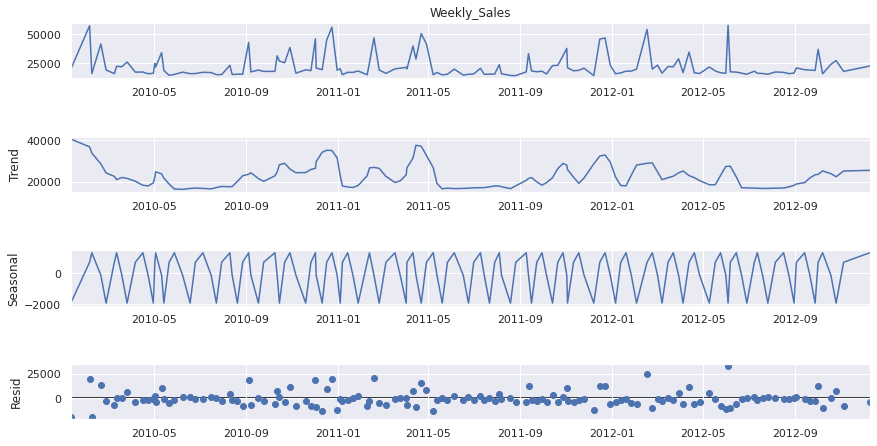

In [77]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq', period=4) #4 weeks in month
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
    
seasonal_decompose(df_store1_dept1['Weekly_Sales'])

* The above decomposition tells the correct story as far as trend, as it could be seen on a year to year basis weekly sales (and monthly sales) were decreasing for this store.

**Checking for Stationarity**

Next, we need to check whether the dataset is stationary or not. A dataset is stationary if its statistical properties like mean, variance, and autocorrelation do not change over time.

Most time series datasets related to business activity are not stationary since there are usually all sorts of non-stationary elements like trends and economic cycles. But, since most time series forecasting models use stationarity—and mathematical transformations related to it—to make predictions, we need to ‘stationarize’ the time series as part of the process of fitting a model.

Two common methods to check for stationarity are Visualization and the Augmented Dickey-Fuller (ADF) Test. Python makes both approaches easy:

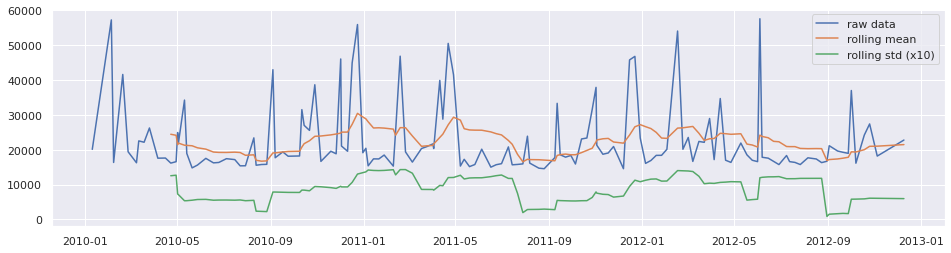

In [86]:
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()
    
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(df_store1_dept1['Weekly_Sales'],'raw data')

* On a long-term basis, the mean and standard deviation seem to keep a certain level, though the volatility in sales can cause short-term alterations.

In [87]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
        
ADF_test(df_store1_dept1['Weekly_Sales'],'raw data')

 > Is the raw data stationary ?
Test statistic = -10.425
P-value = 0.000
Critical values :
	1%: -3.477261624048995 - The data is  stationary with 99% confidence
	5%: -2.8821181874544233 - The data is  stationary with 95% confidence
	10%: -2.5777431104939494 - The data is  stationary with 90% confidence


* This test deems the raw data to be stationary.

**Create Training & Testing Datasets**

The best move appears to be to train data on the data which provides a full year, which is 2010.

In [7]:
y = df_store1_dept1['Weekly_Sales']

'''y_to_train = y['2010-01-10:'2011-01-04'] # dataset to train
y_to_test = y['2011-01-04':] # last X months for test  
predict_date = len(y) - len(y[:'2011-01-04']) # the number of data points for the test set'''

y_to_train = y[0:53] # dataset to train
y_to_test = y[53:] # last X months for test  
predict_date = len(y) - len(y[0:53])

print(y)

Date
2010-01-10    20094.19
2010-02-04    57258.43
2010-02-07    16333.14
2010-02-19    41595.55
2010-02-26    19403.54
                ...   
2012-10-08    16119.92
2012-10-19    24185.27
2012-10-26    27390.81
2012-11-05    18164.20
2012-12-10    22764.01
Name: Weekly_Sales, Length: 143, dtype: float64


In [43]:
print(y[100:120])

Date
100    16065.49
101    16894.40
102    18365.10
103    18378.16
104    20113.03
105    54060.10
106    20124.22
107    23510.49
108    16628.31
109    22366.88
110    22107.70
111    28952.86
112    17147.44
113    34684.21
114    16976.19
115    16347.60
116    21904.47
117    18517.79
118    16963.55
119    16567.69
Name: Weekly_Sales, dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported in

The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is 9348.63
The Root Mean Squared Error of our forecasts with auto optimization is 10460.97


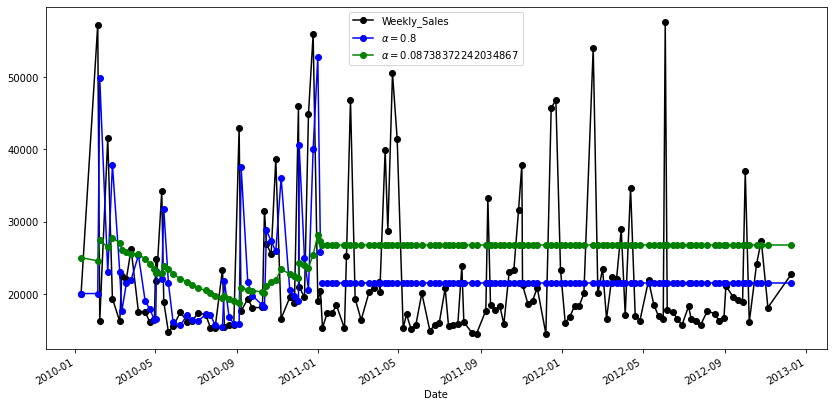

In [57]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 
import matplotlib.pyplot as plt
from statistics import mean

def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    for i in range(len(fcast1)):
        if fcast1.size > 0 and fit1.fittedvalues.size > 0:
            fcast1.rename(index={fcast1.index[i]:y_to_test.index[i+1]}, inplace=True)
        else:
            break
    # specific smoothing level
    fit1.fittedvalues.plot(marker='o',  color='blue')
    fcast1.plot(marker='o', color='blue', legend=True)
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    mse1_lst = []
    for i in range(len(fcast1)):
        mse1_lst.append((fcast1[i] - y_to_test[i]) ** 2)
    mse1 = mean(mse1_lst)
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    for i in range(len(fcast2)):
        if fcast2.size > 0 and fit2.fittedvalues.size > 0:
            fcast2.rename(index={fcast2.index[i]:y_to_test.index[i+1]}, inplace=True)
        else:
            break
    # plot
    fit2.fittedvalues.plot(marker='o', color='green')
    fcast2.plot(marker='o', color='green', legend=True)
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    mse2_lst = []
    for i in range(len(fcast2)):
        mse2_lst.append((fcast2[i] - y_to_test[i]) ** 2)
    mse2 = mean(mse2_lst)
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()
    
ses(y, y_to_train,y_to_test,0.8,predict_date)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


The Root Mean Squared Error of Holts Linear trend 70097.91
The Root Mean Squared Error of Holts Exponential trend 62591.45


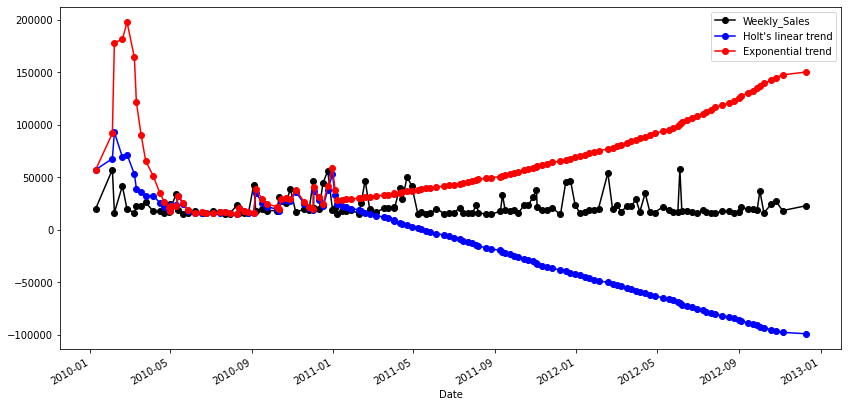

In [58]:
from statsmodels.tsa.api import Holt

def holt(y,y_to_train,y_to_test,smoothing_level,smoothing_slope, predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    for i in range(len(fcast1)):
        if fcast1.size > 0 and fit1.fittedvalues.size > 0:
            fcast1.rename(index={fcast1.index[i]:y_to_test.index[i+1]}, inplace=True)
        else:
            break
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    mse1_lst = []
    for i in range(len(fcast1)):
        mse1_lst.append((fcast1[i] - y_to_test[i]) ** 2)
    mse1 = mean(mse1_lst)
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(y_to_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    for i in range(len(fcast2)):
        if fcast2.size > 0 and fit2.fittedvalues.size > 0:
            fcast2.rename(index={fcast2.index[i]:y_to_test.index[i+1]}, inplace=True)
        else:
            break
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    mse2_lst = []
    for i in range(len(fcast2)):
        mse2_lst.append((fcast2[i] - y_to_test[i]) ** 2)
    mse2 = mean(mse2_lst)
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit1.fittedvalues.plot(marker="o", color='blue')
    fcast1.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='red')
    fcast2.plot(color='red', marker="o", legend=True)

    plt.show()
    
holt(y, y_to_train,y_to_test,0.6,0.2,predict_date)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:60: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecast

2011-01-07    27828.642123
2011-01-14    24581.562819
2011-01-21    26467.698175
2011-01-28    35740.439442
2011-02-09    32004.045482
                  ...     
2012-10-08    74739.017324
2012-10-19    70899.951994
2012-10-26    71370.674688
2012-11-05    62392.932611
2012-12-10    66503.583503
Name: Multiplicative, Length: 94, dtype: float64
The Root Mean Squared Error of additive trend, multiplicative seasonal of period season_length=13 and a Box-Cox transformation 35487.48
The Root Mean Squared Error of additive damped trend, multiplicative seasonal of period season_length=13 and a Box-Cox transformation 27445.96


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


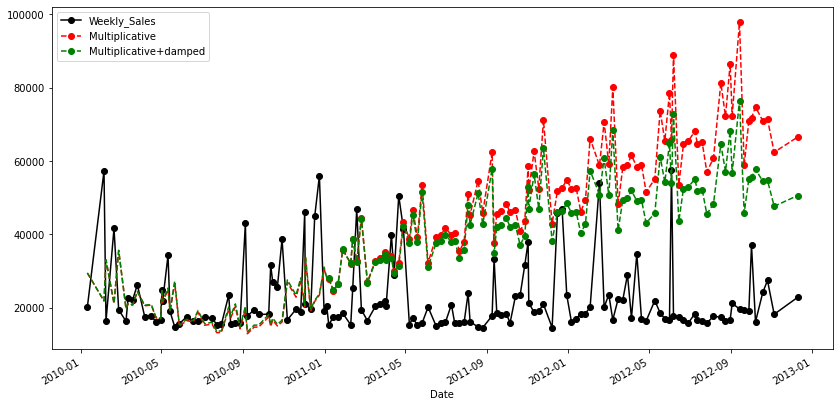

In [86]:
from statsmodels.tsa.api import ExponentialSmoothing

def holt_win_sea(y,y_to_train,y_to_test,seasonal_type,seasonal_period,predict_date):
    
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    if seasonal_type == 'additive':
        fit1 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add').fit()
        fcast1 = fit1.forecast(predict_date).rename('Additive')
        for i in range(len(fcast1)):
            if fcast1.size > 0 and fit1.fittedvalues.size > 0:
                fcast1.rename(index={fcast1.index[i]:y_to_test.index[i+1]}, inplace=True)
            else:
                break
        mse1 = ((fcast1 - y_to_test) ** 2).mean()
        mse1_lst = []
        for i in range(len(fcast1)):
            mse1_lst.append((fcast1[i] - y_to_test[i]) ** 2)
        mse1 = mean(mse1_lst)
        print('The Root Mean Squared Error of additive trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))
        
        fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit()
        fcast2 = fit2.forecast(predict_date).rename('Additive+damped')
        for i in range(len(fcast2)):
            if fcast2.size > 0 and fit2.fittedvalues.size > 0:
                fcast2.rename(index={fcast2.index[i]:y_to_test.index[i+1]}, inplace=True)
            else:
                break
        mse2 = ((fcast2 - y_to_test) ** 2).mean()
        mse2_lst = []
        for i in range(len(fcast2)):
            mse2_lst.append((fcast2[i] - y_to_test[i]) ** 2)
        mse2 = mean(mse2_lst)
        print('The Root Mean Squared Error of additive damped trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse2), 2)))
        
        fit1.fittedvalues.plot(style='--', color='red')
        fcast1.plot(style='--', marker='o', color='red', legend=True)
        fit2.fittedvalues.plot(style='--', color='green')
        fcast2.plot(style='--', marker='o', color='green', legend=True)
    
    elif seasonal_type == 'multiplicative':  
        fit3 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul').fit()
        fcast3 = fit3.forecast(predict_date).rename('Multiplicative')
        for i in range(len(fcast3)):
            if fcast3.size > 0 and fit3.fittedvalues.size > 0:
                fcast3.rename(index={fcast3.index[i]:y_to_test.index[i+1]}, inplace=True)
            else:
                break
        print(fcast3)
        mse3 = ((fcast3 - y_to_test) ** 2).mean()
        mse3_lst = []
        for i in range(len(fcast3)):
            mse3_lst.append((fcast3[i] - y_to_test[i]) ** 2)
        mse3 = mean(mse3_lst)
        print('The Root Mean Squared Error of additive trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse3), 2)))
        
        fit4 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True).fit()
        fcast4 = fit4.forecast(predict_date).rename('Multiplicative+damped')
        for i in range(len(fcast4)):
            if fcast4.size > 0 and fit4.fittedvalues.size > 0:
                fcast4.rename(index={fcast4.index[i]:y_to_test.index[i+1]}, inplace=True)
            else:
                break
        mse4 = ((fcast3 - y_to_test) ** 2).mean()
        mse4_lst = []
        for i in range(len(fcast4)):
            mse4_lst.append((fcast4[i] - y_to_test[i]) ** 2)
        mse4 = mean(mse4_lst)
        print('The Root Mean Squared Error of additive damped trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse4), 2)))
        
        fit3.fittedvalues.plot(style='--', color='red')
        fcast3.plot(style='--', marker='o', color='red', legend=True)
        fit4.fittedvalues.plot(style='--', color='green')
        fcast4.plot(style='--', marker='o', color='green', legend=True)
        
    else:
        print('Wrong Seasonal Type. Please choose between additive and multiplicative')

    plt.show()
    
holt_win_sea(y, y_to_train,y_to_test,'multiplicative',13, predict_date)

In [9]:
import itertools
import statsmodels.api as sm
print(y)

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            param_mini = 0
            param_seasonal_mini = 0
            #try:
            print('We tried it')
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False) #.sarimax

            results = mod.fit()

            if results.aic < mini:
                mini = results.aic
                param_mini = param
                param_seasonal_mini = param_seasonal

            #print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            '''except:
                print('Not working')
                continue'''
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))
    return param, param_seasonal
    
sarima_grid_search(y,52)

Date
2010-01-10    20094.19
2010-02-04    57258.43
2010-02-07    16333.14
2010-02-19    41595.55
2010-02-26    19403.54
                ...   
2012-10-08    16119.92
2012-10-19    24185.27
2012-10-26    27390.81
2012-11-05    18164.20
2012-12-10    22764.01
Name: Weekly_Sales, Length: 143, dtype: float64
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14484D+01    |proj g|=  9.43246D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.86952D+00    |proj g|=  3.73665D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      7      1     0     0   8.858D-06   6.834D+00
  F =   6.8337265882066403     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91143D+00    |proj g|=  1.97765D-01


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   5.408D-06   2.862D+00
  F =   2.8621097589892983     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.87479D+00    |proj g|=  1.35864D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.28600D+00    |proj g|=  3.40590D+00


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.80079D+00    |proj g|=  3.79281D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     10      1     0     0   2.515D-05   6.800D+00
  F =   6.8000788314949014     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89522D+00    |proj g|=  2.00360D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91143D+00    |proj g|=  1.97765D-01


 This problem is unconstrained.



At iterate    5    f=  2.83195D+00    |proj g|=  2.83539D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   7.909D-06   2.832D+00
  F =   2.8319235688046898     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11296D+01    |proj g|=  1.91010D-01

At iterate    5    f=  1.11152D+01    |proj g|=  1.74676D-05

           * * *

Tit   = total number of iterations
Tnf 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se


At iterate    5    f=  6.95389D+00    |proj g|=  6.63419D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.634D-05   6.954D+00
  F =   6.9538872954988644     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.71277D+00    |proj g|=  3.84066D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   2.559D-07   6.712D+00
  F =   6.7118369571909389     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.76325D+00    |proj g|=  3.55163D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   4.755D-06   2.763D+00
  F =   2.7632499846295291     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07711D+00    |proj g|=  7.86351D-02

At iterate    5    f=  7.06689D+00    |proj g|=  7.81564D-05


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     10      1     0     0   2.038D-05   7.067D+00
  F =   7.0668930019265446     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02384D+00    |proj g|=  2.83004D-01


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.90446D+00    |proj g|=  2.67222D-02

At iterate   10    f=  6.90261D+00    |proj g|=  1.60501D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   2.070D-05   6.903D+00
  F =   6.9026088754088653     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90944D+00    |proj g|=  6.45570D-02


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   7.253D-06   2.899D+00
  F =   2.8993675295661481     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80268D+00    |proj g|=  1.22903D-01


 This problem is unconstrained.



At iterate    5    f=  2.75063D+00    |proj g|=  4.27987D-03

At iterate   10    f=  2.75055D+00    |proj g|=  6.59696D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   6.907D-06   2.751D+00
  F =   2.7505465237906699     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07162D+01    |proj g|=  3.33866D-06

           * * *

Tit   = total number of iterations
Tnf 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   7.467D-06   6.741D+00
  F =   6.7407226467806263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.94419D+00    |proj g|=  2.36613D-05


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      7      1     0     0   5.411D-06   6.917D+00
  F =   6.9170894142080455     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89173D+00    |proj g|=  1.17765D-01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   5.922D-06   2.832D+00
  F =   2.8319569202812764     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.81054D+00    |proj g|=  3.48912D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.74398D+00    |proj g|=  6.96822D-02


 This problem is unconstrained.



At iterate    5    f=  6.73358D+00    |proj g|=  6.94819D-02

At iterate   10    f=  6.73085D+00    |proj g|=  7.42366D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   7.424D-06   6.731D+00
  F =   6.7308478866262114     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.93054D+00    |proj g|=  1.48734D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   1.487D-06   2.931D+00
  F =   2.9305403883546868     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89173D+00    |proj g|=  1.17765D-01


 This problem is unconstrained.



At iterate    5    f=  2.82897D+00    |proj g|=  2.21181D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   6.269D-06   2.829D+00
  F =   2.8289741963720330     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04382D+01    |proj g|=  2.13729D-01

At iterate    5    f=  1.03685D+01    |proj g|=  1.65698D-02

           * * *

Tit   = total number of iterations
Tnf 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se


At iterate    5    f=  6.51541D+00    |proj g|=  7.95479D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     14      1     0     0   1.069D-05   6.515D+00
  F =   6.5153617119210150     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.71482D+00    |proj g|=  1.11045D-01


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      9      1     0     0   9.474D-06   6.673D+00
  F =   6.6726493404804197     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76468D+00    |proj g|=  1.05336D-01


 This problem is unconstrained.



At iterate    5    f=  2.68259D+00    |proj g|=  3.63488D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     14      1     0     0   1.154D-05   2.683D+00
  F =   2.6825587109539675     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.71136D+00    |proj g|=  1.32857D-01


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.66419D+00    |proj g|=  3.46479D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     11      1     0     0   1.075D-05   6.664D+00
  F =   6.6641798166812869     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57081D+00    |proj g|=  1.31985D-01


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.51412D+00    |proj g|=  4.61364D-03

At iterate   10    f=  6.51141D+00    |proj g|=  5.93100D-02

At iterate   15    f=  6.50897D+00    |proj g|=  6.12119D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     22      1     0     0   1.275D-05   6.509D+00
  F =   6.5089738818826435     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87768D+00    |proj g|=  6.41139D-02


 This problem is unconstrained.



At iterate    5    f=  2.86076D+00    |proj g|=  5.90092D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     10      1     0     0   6.956D-06   2.861D+00
  F =   2.8607574921895491     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76468D+00    |proj g|=  1.05336D-01


 This problem is unconstrained.



At iterate    5    f=  2.68234D+00    |proj g|=  3.00323D-03

At iterate   10    f=  2.68226D+00    |proj g|=  1.17226D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     13      1     0     0   1.131D-05   2.682D+00
  F =   2.6822600017573408     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07817D+01    |proj g|=  1.89921D-05

           * * *

Tit   = total number of iterations
Tnf 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se


At iterate    5    f=  6.79032D+00    |proj g|=  9.46692D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   9.467D-06   6.790D+00
  F =   6.7903244649022287     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.82601D+00    |proj g|=  3.16946D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90853D+00    |proj g|=  1.85161D-01

At iterate    5    f=  2.86116D+00    |proj g|=  6.07789D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   6.078D-06   2.861D+00
  F =   2.8611551517068259     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.79306D+00    |proj g|=  7.72856D-02

At iterate   10    f=  6.78717D+00    |proj g|=  1.62893D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     16      1     0     0   7.367D-06   6.787D+00
  F =   6.7871673598154070     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.79691D+00    |proj g|=  1.01705D-01


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.78765D+00    |proj g|=  2.31491D-02

At iterate   10    f=  6.77042D+00    |proj g|=  1.03305D-02

At iterate   15    f=  6.76905D+00    |proj g|=  4.11675D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     27      1     0     0   1.033D-05   6.769D+00
  F =   6.7690448331437834     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83938D+00    |proj g|=  4.54886D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   7.935D-06   2.833D+00
  F =   2.8328304466445520     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90853D+00    |proj g|=  1.85161D-01


 This problem is unconstrained.



At iterate    5    f=  2.83042D+00    |proj g|=  5.55778D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     11      1     0     0   8.331D-06   2.830D+00
  F =   2.8303820128172239     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05241D+01    |proj g|=  2.75250D-01

At iterate    5    f=  1.04607D+01    |proj g|=  1.39227D+00

At iterate   10    f=  1.04437D+01    |proj g|=  4.12675D

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se


At iterate    5    f=  6.59573D+00    |proj g|=  9.45979D-01

At iterate   10    f=  6.59357D+00    |proj g|=  1.38466D-01

At iterate   15    f=  6.58789D+00    |proj g|=  1.53977D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     29      1     0     0   2.197D-05   6.588D+00
  F =   6.5878420678947487     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.71255D+00    |proj g|=  3.32801D-02

At iterate    5    f=  6.71176D+00    |proj g|=  3.16813D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     10      1     0     0   3.168D-07   6.712D+00
  F =   6.7117554161946025     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80312D+00    |proj g|=  1.23497D-01


 This problem is unconstrained.



At iterate    5    f=  2.76309D+00    |proj g|=  4.48890D-04

At iterate   10    f=  2.76302D+00    |proj g|=  3.67220D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   8.538D-06   2.763D+00
  F =   2.7630051997069884     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.89939D+00    |proj g|=  5.06287D-01


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.71031D+00    |proj g|=  1.12907D-01

At iterate   10    f=  6.67685D+00    |proj g|=  1.17094D+00

At iterate   15    f=  6.66446D+00    |proj g|=  8.34402D-01

At iterate   20    f=  6.66328D+00    |proj g|=  5.67871D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     35      1     0     0   5.679D-05   6.663D+00
  F =   6.6632753523666599     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.59990D+00    |proj g|=  9.46052D-01

At iterate   10    f=  6.58479D+00    |proj g|=  6.97000D-02

At iterate   15    f=  6.58478D+00    |proj g|=  9.03459D-02

At iterate   20    f=  6.58404D+00    |proj g|=  9.68895D-01

At iterate   25    f=  6.57985D+00    |proj g|=  9.04403D-01

At iterate   30    f=  6.57247D+00    |proj g|=  4.58983D-01

At iterate   35    f=  6.56673D+00    |proj g|=  2.01544D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     57      1     0     0   1.946D-05   6.567D+00
  F =   6.5667335671955946     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83722D+00    |proj g|=  5.87058D-02

At iterate    5    f=  2.82666D+00    |proj g|=  7.58602D-03

At iterate   10    f=  2.82386D+00    |proj g|=  1.66257D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     21      1     0     0   7.266D-06   2.824D+00
  F =   2.8238533215075061     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80312D+00    |proj g|=  1.23497D-01


 This problem is unconstrained.



At iterate    5    f=  2.75068D+00    |proj g|=  1.97856D-02

At iterate   10    f=  2.75040D+00    |proj g|=  6.53130D-03

At iterate   15    f=  2.74657D+00    |proj g|=  2.85190D-02

At iterate   20    f=  2.74621D+00    |proj g|=  7.64704D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     35      1     0     0   7.647D-06   2.746D+00
  F =   2.7462073479989928     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bou

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   1.170D-06   6.684D+00
  F =   6.6840051877222022     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.84195D+00    |proj g|=  4.20268D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86753D+00    |proj g|=  1.42905D-01


 This problem is unconstrained.



At iterate    5    f=  2.78316D+00    |proj g|=  3.91605D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      8      1     0     0   8.605D-06   2.783D+00
  F =   2.7831603204301456     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68362D+00    |proj g|=  3.24590D-02


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   1.484D-06   6.682D+00
  F =   6.6822792171909082     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68980D+00    |proj g|=  8.82226D-02

At iterate    5    f=  6.68123D+00    |proj g|=  3.72340D-02

At iterate   10    f=  6.67246D+00    |proj g|=  1.32662D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     15      1     0     0   3.525D-06   6.672D+00
  F =   6.6724572614893853     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   6.143D-06   2.815D+00
  F =   2.8152049905929335     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86753D+00    |proj g|=  1.42905D-01

At iterate    5    f=  2.78089D+00    |proj g|=  2.06898D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      8      1     0     0   8.900D-06   2.781D+00
  F =   2.7808743246404610     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  se


At iterate    5    f=  6.50810D+00    |proj g|=  1.16739D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   2.825D-05   6.508D+00
  F =   6.5080939884115159     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.71343D+00    |proj g|=  1.16081D-01


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.66941D+00    |proj g|=  4.01405D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     17      1     0     0   9.756D-06   6.668D+00
  F =   6.6676923638988281     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76387D+00    |proj g|=  1.04149D-01


 This problem is unconstrained.



At iterate    5    f=  2.68225D+00    |proj g|=  5.56852D-03

At iterate   10    f=  2.68219D+00    |proj g|=  1.16567D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   1.166D-05   2.682D+00
  F =   2.6821907526914210     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.61611D+00    |proj g|=  1.95716D-01


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.57815D+00    |proj g|=  5.66037D-03

At iterate   10    f=  6.57811D+00    |proj g|=  1.21032D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   1.210D-05   6.578D+00
  F =   6.5781060409925765     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.54976D+00    |proj g|=  1.84119D-01

At iterate    5    f=  6.50704D+00    |proj g|=  1.09064D-02

At iterate   10    f=  6.50546D+00    |proj g|=  2.73310D-02

At iterate   15    f=  6.50355D+00    |proj g|=  2.41346D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   1.282D-05   6.504D+00
  F =   6.5035336742775698     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80350D+00    |proj g|=  6.25965D-02


 This problem is unconstrained.



At iterate    5    f=  2.78753D+00    |proj g|=  3.19022D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   6.491D-06   2.787D+00
  F =   2.7874690288823136     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76387D+00    |proj g|=  1.04149D-01


 This problem is unconstrained.



At iterate    5    f=  2.68108D+00    |proj g|=  2.68952D-03

At iterate   10    f=  2.68097D+00    |proj g|=  3.19675D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     13      1     0     0   1.124D-05   2.681D+00
  F =   2.6809675943840765     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
The set of parameters with the minimum AIC is: SARIMA0x0 - AIC:773.2117913328347


((1, 1, 1), (1, 1, 1, 52))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.91978D+00    |proj g|=  4.14885D-01

At iterate    5    f=  6.77499D+00    |proj g|=  1.69914D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     10      1     0     0   2.010D-05   6.775D+00
  F =   6.7749738994058246     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


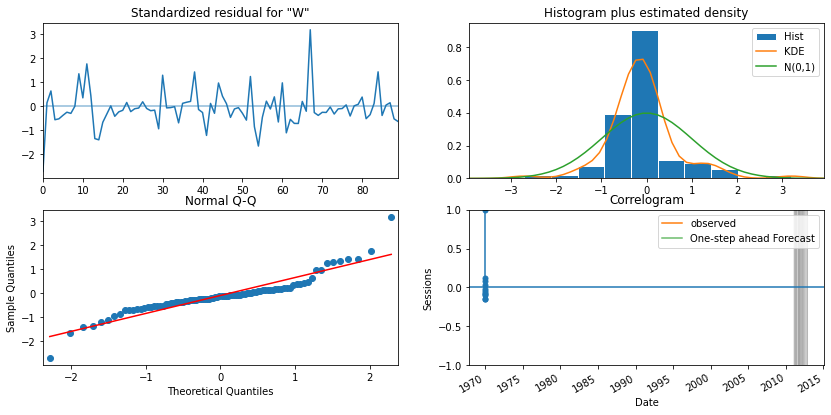

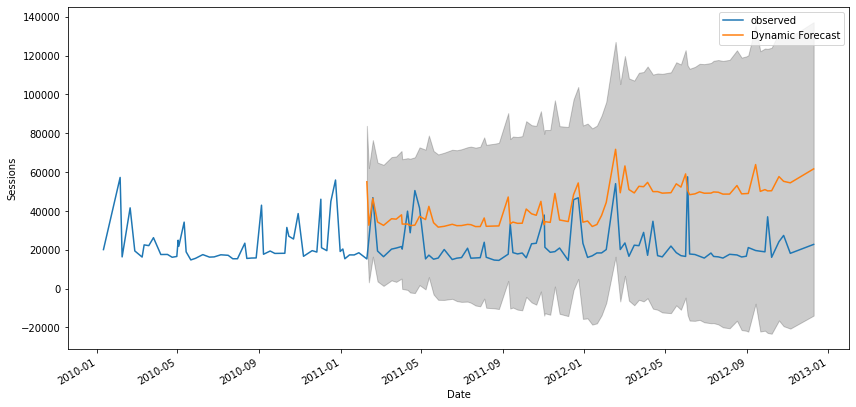

In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order
                                ) #enforce_stationarity=False,enforce_invertibility=False

    results = mod.fit()
    #print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    #plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=(pred_date), dynamic=False) #pd.to_datetime
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    #print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=(pred_date), dynamic=True, full_results=True) #pd.to_datetime
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    #print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results)

model = sarima_eva(y = y,order  = (0, 1, 1), seasonal_order = (0, 1, 1, 52), seasonal_period = 52, pred_date = y.index[53],y_to_test = y_to_test)



/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.91978D+00    |proj g|=  4.14885D-01

At iterate    5    f=  6.77499D+00    |proj g|=  1.69914D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     10      1     0     0   2.010D-05   6.775D+00
  F =   6.7749738994058246     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


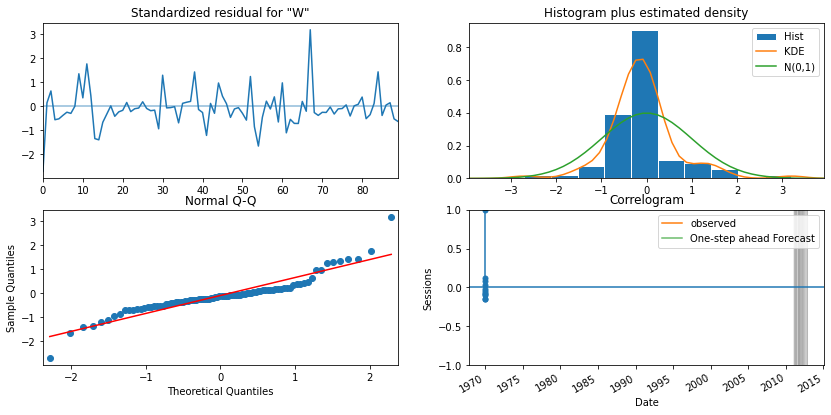

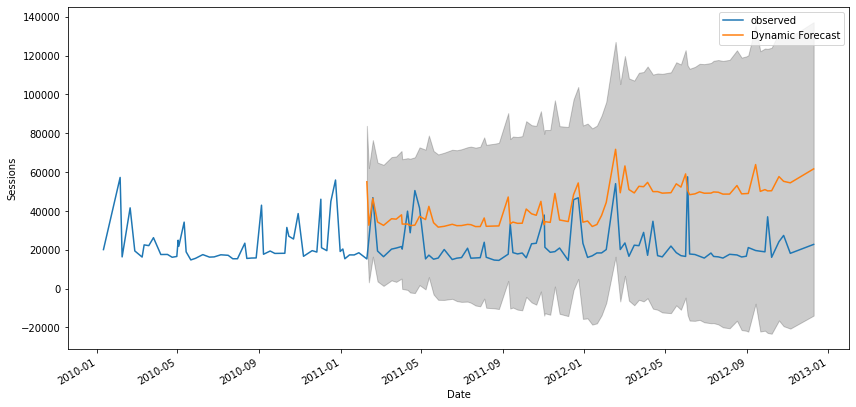

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


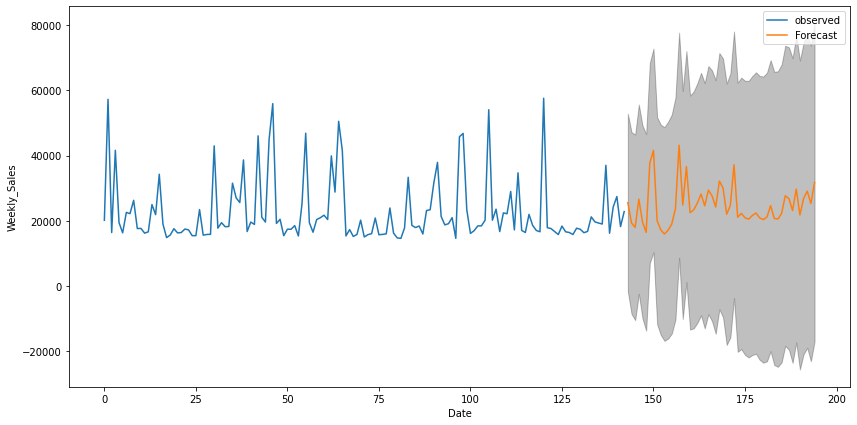

The total amount of sales predicted for the next year for the dept #1 of the store #1 =  1293057.8398338454


In [11]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)
    #print(pred_uc)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()
    #print(pred_ci.index[1])
    #print(y.index[1])
    for i in range(len(y)):
        y.rename(index={y.index[i]:i}, inplace=True)
    #print(y.index[1])
    ax = y.plot(label='observed', figsize=(14, 7))
    #print(ax)
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)


model = sarima_eva(y = y,order  = (0, 1, 1), seasonal_order = (0, 1, 1, 52), seasonal_period = 52, pred_date = y.index[53] ,y_to_test = y_to_test)
final_table = forecast(model,52,y)
final_table.head()
print('The total amount of sales predicted for the next year for the dept #1 of the store #1 = ', final_table['Predicted_Mean'].sum())

In [12]:
def df_each_store_each_dept(list_of_stores):
    dataframe_dict = {}
    for store in list_of_stores: #for each store
        for dept in list(how_many_unique_departments_in_the_store(sales_df, store)): #for each department in the store
            df_store = sales_df[(sales_df['Store'] == store)] 
            df_store_dept = df_store[df_store['Dept'] == dept] #Create a dataframe of each store based on department
            
            df_store_dept['Date']= pd.to_datetime(df_store_dept['Date'])
            df_store_dept = df_store_dept.set_index('Date') 
            df_store_dept = df_store_dept.sort_index()
            
            dataframe_dict['Store_'+str(store)+'_Dept_'+str(dept)] = df_store_dept
            
    return dataframe_dict

dict_of_stores = df_each_store_each_dept(list_of_stores = list(sales_df['Store'].unique()))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05411D+01    |proj g|=  1.96820D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.968D-07   1.054D+01
  F =   10.541052002990623     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  9.32403D+00    |proj g|=  2.65683D-03

At iterate   15    f=  9.32284D+00    |proj g|=  5.42063D-02

At iterate   20    f=  7.20911D+00    |proj g|=  1.97781D-01

At iterate   25    f=  6.56231D+00    |proj g|=  2.53980D-02

At iterate   30    f=  6.45521D+00    |proj g|=  9.82143D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     34     43      1     0     0   1.979D-06   6.454D+00
  F =   6.4538225096420341     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43443D+00    |proj g|=  3.41098D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      7      1     0     0   4.550D-06   5.398D+00
  F =   5.3983854877261317     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28676D+00    |proj g|=  1.05951D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   1.471D-05   2.282D+00
  F =   2.2820818414119102     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     14      1     0     0   1.863D-04   5.450D+00
  F =   5.4498142662351681     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88599D+01    |proj g|=  4.58606D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.36739D+00    |proj g|=  2.26705D-01

At iterate   10    f=  5.36681D+00    |proj g|=  5.34954D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     11      1     0     0   5.350D-05   5.367D+00
  F =   5.3668114263958246     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.32203D+00    |proj g|=  1.40048D-06

           * * *

Tit   = total number of iterations
Tnf 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28676D+00    |proj g|=  1.05951D-01


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.24083D+00    |proj g|=  1.41143D-01

At iterate   10    f=  2.23308D+00    |proj g|=  6.13076D-05

At iterate   15    f=  2.23306D+00    |proj g|=  2.59333D-03

At iterate   20    f=  2.23178D+00    |proj g|=  3.13404D-02

At iterate   25    f=  2.22617D+00    |proj g|=  1.60850D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     36      1     0     0   1.441D-06   2.226D+00
  F =   2.2261667342694467     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M = 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.34408D+00    |proj g|=  4.84792D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   5.356D-05   6.344D+00
  F =   6.3440339824449703     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34028D+00    |proj g|=  2.46171D-02


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   1.791D-06   5.340D+00
  F =   5.3399328287268286     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22644D+00    |proj g|=  9.99322D-02

At iterate    5    f=  2.21418D+00    |proj g|=  1.12538D-05

At iterate   10    f=  2.21418D+00    |proj g|=  1.18453D-03

At iterate   15    f=  2.21404D+00    |proj g|=  7.29988D-03

At iterate   20    f=  2.21396D+00    |proj g|=  3.67533D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     26      1     0     0   3.675D-06   2.214D+00
  F =   2.2139639005766516     

CONVERG

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.44299D+00    |proj g|=  8.91553D-05

At iterate   10    f=  6.44298D+00    |proj g|=  6.63788D-04

At iterate   15    f=  6.44285D+00    |proj g|=  7.88493D-03

At iterate   20    f=  6.43166D+00    |proj g|=  6.49185D-02

At iterate   25    f=  5.80059D+00    |proj g|=  7.02847D-01

At iterate   30    f=  5.46024D+00    |proj g|=  8.26741D-01

At iterate   35    f=  5.44787D+00    |proj g|=  2.66971D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     57      1     0     0   4.032D-05   5.448D+00
  F =   5.4478704855703386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.30290D+00    |proj g|=  1.35118D-02

At iterate   10    f=  6.30117D+00    |proj g|=  1.20612D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   6.205D-05   6.301D+00
  F =   6.3011673921654090     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.32023D+00    |proj g|=  7.00107D-02


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.31263D+00    |proj g|=  4.23096D-05

At iterate   10    f=  2.31263D+00    |proj g|=  1.34750D-03

At iterate   15    f=  2.31220D+00    |proj g|=  1.46936D-02

At iterate   20    f=  2.30949D+00    |proj g|=  7.88599D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   4.601D-06   2.309D+00
  F =   2.3094872015385666     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22644D+00    |proj g|=  9.99322D-02


 This problem is unconstrained.



At iterate    5    f=  2.19069D+00    |proj g|=  8.96611D-02

At iterate   10    f=  2.17767D+00    |proj g|=  4.52905D-04

At iterate   15    f=  2.17767D+00    |proj g|=  3.26858D-04

At iterate   20    f=  2.17759D+00    |proj g|=  5.27398D-03

At iterate   25    f=  2.17137D+00    |proj g|=  3.45721D-02

At iterate   30    f=  2.16876D+00    |proj g|=  2.29128D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     34      1     0     0   4.292D-06   2.169D+00
  F =   2.1687608701297139     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           *

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   9.699D-06   5.345D+00
  F =   5.3451890166531468     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56541D+00    |proj g|=  2.68102D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      8      1     0     0   2.482D-06   5.526D+00
  F =   5.5258120833084501     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.24569D+00    |proj g|=  5.88036D-05

At iterate   10    f=  2.24567D+00    |proj g|=  1.87952D-03

At iterate   15    f=  2.24349D+00    |proj g|=  2.51188D-02

At iterate   20    f=  2.23140D+00    |proj g|=  2.23494D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     26      1     0     0   4.503D-07   2.231D+00
  F =   2.2313435829124906     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bou

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.35029D+00    |proj g|=  6.41644D-02


 This problem is unconstrained.



At iterate    5    f=  5.34078D+00    |proj g|=  3.05059D-02

At iterate   10    f=  5.33939D+00    |proj g|=  1.23876D-04

At iterate   15    f=  5.33927D+00    |proj g|=  4.78299D-03

At iterate   20    f=  5.33777D+00    |proj g|=  2.18460D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   1.842D-06   5.338D+00
  F =   5.3377480938130288     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29553D+00    |proj g|=  2.34639D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   2.346D-06   2.296D+00
  F =   2.2955253453901072     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26874D+00    |proj g|=  1.10041D-01


 This problem is unconstrained.



At iterate    5    f=  2.24578D+00    |proj g|=  6.30441D-03

At iterate   10    f=  2.24562D+00    |proj g|=  8.12217D-05

At iterate   15    f=  2.24559D+00    |proj g|=  2.01843D-03

At iterate   20    f=  2.24172D+00    |proj g|=  2.33328D-02

At iterate   25    f=  2.22837D+00    |proj g|=  1.73851D-03

At iterate   30    f=  2.22835D+00    |proj g|=  5.97567D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     37      1     0     0   7.149D-06   2.228D+00
  F =   2.2283499541690839     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           *

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.14741D+00    |proj g|=  3.07260D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   4.128D-05   5.147D+00
  F =   5.1474065140607337     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28772D+00    |proj g|=  4.78972D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.14765D+00    |proj g|=  8.68332D-02


 This problem is unconstrained.



At iterate    5    f=  2.12714D+00    |proj g|=  2.08334D-03

At iterate   10    f=  2.12714D+00    |proj g|=  5.96895D-04

At iterate   15    f=  2.12702D+00    |proj g|=  8.85198D-03

At iterate   20    f=  2.11887D+00    |proj g|=  4.53361D-02

At iterate   25    f=  2.11374D+00    |proj g|=  2.04685D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     33      1     0     0   1.120D-06   2.114D+00
  F =   2.1136979271993424     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M = 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.25670D+00    |proj g|=  3.98292D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   3.983D-05   5.257D+00
  F =   5.2566977838009166     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.15498D+00    |proj g|=  1.00052D-01

At iterate    5    f=  5.13574D+00    |proj g|=  3.29482D-02

At iterate   10    f=  5.13382D+00    |proj g|=  7.72300D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   7.723D-05   5.134D+00
  F =   5.1338218977750207     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24635D+00    |proj g|=  2.70587D-02

At iterate    5    f=  2.24478D+00    |proj g|=  7.36715D-05

At iterate   10    f=  2.24477D+00    |proj g|=  2.31159D-03

At iterate   15    f=  2.24337D+00    |proj g|=  2.74671D-02

At iterate   20    f=  2.23194D+00    |proj g|=  5.80251D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   2.063D-06   2.232D+00
  F =   2.2318661930734511     

CONVERG

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.14765D+00    |proj g|=  1.10505D-01


 This problem is unconstrained.



At iterate    5    f=  2.12405D+00    |proj g|=  3.01941D-03

At iterate   10    f=  2.12383D+00    |proj g|=  7.07113D-05

At iterate   15    f=  2.12382D+00    |proj g|=  1.08263D-03

At iterate   20    f=  2.12257D+00    |proj g|=  2.15202D-02

At iterate   25    f=  2.11128D+00    |proj g|=  5.10102D-03

At iterate   30    f=  2.11119D+00    |proj g|=  6.27103D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     35      1     0     0   1.220D-05   2.111D+00
  F =   2.1111884819442142     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           *

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.40531D+00    |proj g|=  2.07238D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   1.344D-05   5.404D+00
  F =   5.4041442692269586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39562D+00    |proj g|=  3.20481D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27891D+00    |proj g|=  1.01858D-01


 This problem is unconstrained.



At iterate    5    f=  2.26311D+00    |proj g|=  1.57718D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   2.760D-05   2.263D+00
  F =   2.2631050434236948     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.66818D+00    |proj g|=  5.87251D-01


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.39637D+00    |proj g|=  1.38291D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     17      1     0     0   1.180D-05   5.388D+00
  F =   5.3880086712034387     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40972D+00    |proj g|=  6.71667D-02


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.39951D+00    |proj g|=  1.92849D-01

At iterate   10    f=  5.39755D+00    |proj g|=  3.68684D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     18      1     0     0   3.687D-05   5.398D+00
  F =   5.3975482204892220     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25778D+00    |proj g|=  6.55051D-02


 This problem is unconstrained.



At iterate    5    f=  2.24855D+00    |proj g|=  3.02916D-04

At iterate   10    f=  2.24841D+00    |proj g|=  7.43272D-03

At iterate   15    f=  2.24546D+00    |proj g|=  2.14758D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     24      1     0     0   7.662D-07   2.245D+00
  F =   2.2446598422062629     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27891D+00    |proj g|=  1.01858D-01


 This problem is unconstrained.



At iterate    5    f=  2.24212D+00    |proj g|=  4.59915D-02

At iterate   10    f=  2.23322D+00    |proj g|=  1.70210D-04

At iterate   15    f=  2.23322D+00    |proj g|=  6.68672D-04

At iterate   20    f=  2.23313D+00    |proj g|=  9.16326D-03

At iterate   25    f=  2.22790D+00    |proj g|=  5.58284D-02

At iterate   30    f=  2.22304D+00    |proj g|=  6.85279D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     34      1     0     0   1.214D-06   2.223D+00
  F =   2.2230386641292559     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           *

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.21377D+00    |proj g|=  1.40596D+00

At iterate   10    f=  5.20965D+00    |proj g|=  1.28714D-01

At iterate   15    f=  5.20851D+00    |proj g|=  2.36794D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     22      1     0     0   5.788D-05   5.209D+00
  F =   5.2085064713082394     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.81602D+00    |proj g|=  6.29498D+01

At iterate    5    f=  5.33612D+00    |proj g|=  1.94370D-02

At iterate   10    f=  5.33572D+00    |proj g|=  3.27104D-02

At iterate   15    f=  5.31860D+00    |proj g|=  3.87935D-02

At iterate   20    f=  5.31649D+00    |proj g|=  1.18140D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     25      1     0     0   1.181D-05   5.316D+00
  F =   5.3164867704634444     

CONVERG

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20853D+00    |proj g|=  1.24409D-01


 This problem is unconstrained.



At iterate    5    f=  2.18114D+00    |proj g|=  3.96608D-02

At iterate   10    f=  2.17580D+00    |proj g|=  1.83673D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     18      1     0     0   6.120D-05   2.176D+00
  F =   2.1757993094014489     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49340D+00    |proj g|=  5.99568D-01


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.35705D+00    |proj g|=  1.02934D+00

At iterate   10    f=  5.28589D+00    |proj g|=  2.85918D+00

At iterate   15    f=  5.28412D+00    |proj g|=  8.02672D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     32      1     0     0   1.440D-04   5.284D+00
  F =   5.2840674726613788     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.21977D+00    |proj g|=  3.17405D-01

At iterate    5    f=  5.20330D+00    |proj g|=  2.36616D-01

At iterate   10    f=  5.20189D+00    |proj g|=  5.81947D-02

At iterate   15    f=  5.19768D+00    |proj g|=  1.77312D+00

At iterate   20    f=  5.19219D+00    |proj g|=  8.44036D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     30      1     0     0   9.132D-04   5.192D+00
  F =   5.1921609430354403     

CONVERG

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.49332D+00    |proj g|=  1.60808D+01


 This problem is unconstrained.



At iterate    5    f=  2.24995D+00    |proj g|=  1.42425D-01

At iterate   10    f=  2.24157D+00    |proj g|=  3.23484D-03

At iterate   15    f=  2.23819D+00    |proj g|=  4.14152D-01

At iterate   20    f=  2.22957D+00    |proj g|=  8.75334D-02

At iterate   25    f=  2.22721D+00    |proj g|=  1.35367D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     53      1     0     0   6.968D-04   2.227D+00
  F =   2.2271794608700555     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20853D+00    |proj g|=  3.50730D-01


 This problem is unconstrained.



At iterate    5    f=  2.17590D+00    |proj g|=  1.32779D-01

At iterate   10    f=  2.16849D+00    |proj g|=  2.33410D-02

At iterate   15    f=  2.16847D+00    |proj g|=  7.30296D-02

At iterate   20    f=  2.16802D+00    |proj g|=  2.93754D-02

At iterate   25    f=  2.16793D+00    |proj g|=  7.88310D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     38      1     0     0   7.417D-05   2.168D+00
  F =   2.1679268296454564     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M = 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.24405D+00    |proj g|=  4.46064D-05

At iterate   10    f=  5.24404D+00    |proj g|=  2.30791D-03

At iterate   15    f=  5.24350D+00    |proj g|=  1.36723D-02

At iterate   20    f=  5.24318D+00    |proj g|=  3.05622D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   3.056D-06   5.243D+00
  F =   5.2431803517918052     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40159D+00    |proj g|=  4.67910D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.679D-06   5.402D+00
  F =   5.4015877011640256     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  2.20765D+00    |proj g|=  1.68342D-04

At iterate   10    f=  2.20764D+00    |proj g|=  1.55175D-03

At iterate   15    f=  2.20596D+00    |proj g|=  1.70634D-02

At iterate   20    f=  2.20061D+00    |proj g|=  1.06126D-02

At iterate   25    f=  2.20003D+00    |proj g|=  3.97745D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     33      1     0     0   1.785D-06   2.200D+00
  F =   2.2000246087573743     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M = 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.24546D+00    |proj g|=  4.90423D-04

At iterate   10    f=  5.24538D+00    |proj g|=  9.60979D-03

At iterate   15    f=  5.24506D+00    |proj g|=  1.06642D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     23      1     0     0   5.873D-06   5.245D+00
  F =   5.2450581131833340     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25401D+00    |proj g|=  8.91876D

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.24405D+00    |proj g|=  8.28625D-03

At iterate   10    f=  5.24399D+00    |proj g|=  1.27867D-04

At iterate   15    f=  5.24397D+00    |proj g|=  2.43587D-03

At iterate   20    f=  5.24315D+00    |proj g|=  5.99499D-03

At iterate   25    f=  5.24269D+00    |proj g|=  2.95472D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     30      1     0     0   7.457D-06   5.243D+00
  F =   5.2426946469651812     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21041D+00    |proj g|=  2.45137D-02


 This problem is unconstrained.



At iterate    5    f=  2.20887D+00    |proj g|=  1.33662D-04

At iterate   10    f=  2.20886D+00    |proj g|=  2.42266D-03

At iterate   15    f=  2.20712D+00    |proj g|=  2.49158D-02

At iterate   20    f=  2.20240D+00    |proj g|=  1.57713D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   3.419D-09   2.202D+00
  F =   2.2024014853127531     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22268D+00    |proj g|=  7.53541D-02


 This problem is unconstrained.



At iterate    5    f=  2.20762D+00    |proj g|=  3.84216D-03

At iterate   10    f=  2.20758D+00    |proj g|=  5.40786D-05

At iterate   15    f=  2.20757D+00    |proj g|=  1.29545D-03

At iterate   20    f=  2.20675D+00    |proj g|=  1.37606D-02

At iterate   25    f=  2.19903D+00    |proj g|=  1.51362D-02

At iterate   30    f=  2.19827D+00    |proj g|=  2.35021D-03

At iterate   35    f=  2.19823D+00    |proj g|=  4.98037D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     38      1     0     0   4.980D-06   2.198D+00
  F =   2.1982269593842343     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.14674D+00    |proj g|=  8.96236D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      9      1     0     0   3.212D-05   5.147D+00
  F =   5.1467382300709374     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28347D+00    |proj g|=  7.94949D-02


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.27906D+00    |proj g|=  3.69023D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   3.690D-05   5.279D+00
  F =   5.2790592258444882     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15287D+00    |proj g|=  7.28870D-02

At iterate    5    f=  2.12508D+00    |proj g|=  2.50539D-02

At iterate   10    f=  2.12468D+00    |proj g|=  6.65791D-05

At iterate   15    f=  2.12468D+00    |proj g|=  1.16400D-03

At iterate   20    f=  2.12413D+00    |proj g|=  1.28848D-02

At iterate   25    f=  2.11344D+00    |proj g|=  2.67811D-02

At iterate   30    f=  2.11270D+00    |proj g|=  2.22025D-02

At iterate   35    f=  2.11221D+00    |proj g|=  4.53336D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.19662D+00    |proj g|=  3.41746D-04

At iterate   10    f=  5.19662D+00    |proj g|=  6.81145D-04

At iterate   15    f=  5.19644D+00    |proj g|=  6.75180D-03

At iterate   20    f=  5.19573D+00    |proj g|=  1.14728D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     23      1     0     0   1.147D-05   5.196D+00
  F =   5.1957295184516274     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
We tried it
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.13746D+00    |proj g|=  3.04080D-02

At iterate   10    f=  5.13371D+00    |proj g|=  1.26774D-04

At iterate   15    f=  5.13371D+00    |proj g|=  3.80855D-04

At iterate   20    f=  5.13363D+00    |proj g|=  5.09106D-03

At iterate   25    f=  5.13004D+00    |proj g|=  1.95488D-02

At iterate   30    f=  5.12272D+00    |proj g|=  4.40849D-02

At iterate   35    f=  5.11315D+00    |proj g|=  9.29304D-03

At iterate   40    f=  5.11150D+00    |proj g|=  4.29864D-03

At iterate   45    f=  5.11140D+00    |proj g|=  1.09176D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     53   

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19764D+00    |proj g|=  3.14401D-02


 This problem is unconstrained.



At iterate    5    f=  2.18457D+00    |proj g|=  4.56995D-03

At iterate   10    f=  2.18456D+00    |proj g|=  2.52423D-04

At iterate   15    f=  2.18443D+00    |proj g|=  5.71141D-03

At iterate   20    f=  2.17782D+00    |proj g|=  5.13808D-02

At iterate   25    f=  2.17373D+00    |proj g|=  3.35101D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     33      1     0     0   3.755D-06   2.174D+00
  F =   2.1737348059896355     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
We tried it


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15287D+00    |proj g|=  7.83630D-02


 This problem is unconstrained.



At iterate    5    f=  2.12152D+00    |proj g|=  4.86118D-03

At iterate   10    f=  2.12128D+00    |proj g|=  7.04148D-05

At iterate   15    f=  2.12128D+00    |proj g|=  1.19331D-03

At iterate   20    f=  2.12064D+00    |proj g|=  1.81814D-02

At iterate   25    f=  2.11030D+00    |proj g|=  2.86960D-02

At iterate   30    f=  2.10902D+00    |proj g|=  2.38090D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     42      1     0     0   4.982D-06   2.109D+00
  F =   2.1090084209673994     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
The set of parameters with the minimum AIC is: SARI

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42842D+00    |proj g|=  2.12133D-01


 This problem is unconstrained.



At iterate    5    f=  5.36389D+00    |proj g|=  1.18953D-02

At iterate   10    f=  5.36211D+00    |proj g|=  3.91385D-04

At iterate   15    f=  5.36211D+00    |proj g|=  5.97103D-04

At iterate   20    f=  5.36198D+00    |proj g|=  7.75740D-03

At iterate   25    f=  5.35083D+00    |proj g|=  1.99334D-02

At iterate   30    f=  5.34529D+00    |proj g|=  3.21071D-02

At iterate   35    f=  5.33904D+00    |proj g|=  1.47254D-02

At iterate   40    f=  5.33632D+00    |proj g|=  9.86140D-03

At iterate   45    f=  5.33583D+00    |proj g|=  3.30772D-03


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f=  5.33575D+00    |proj g|=  3.60886D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     57      1     0     0   3.609D-04   5.336D+00
  F =   5.3357468916694168     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


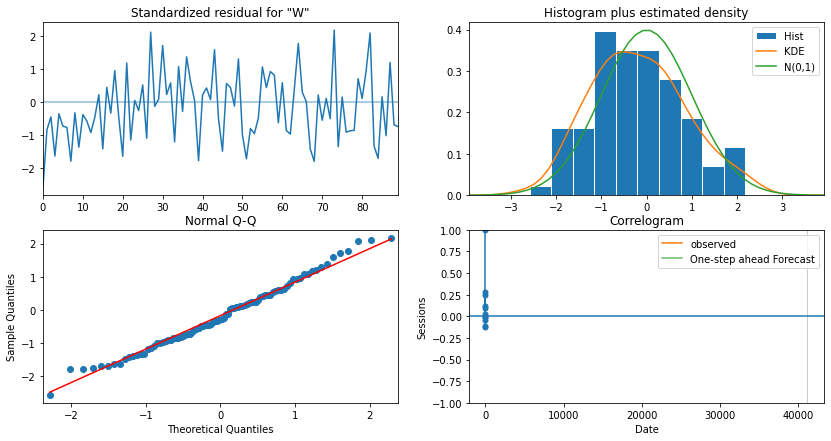

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


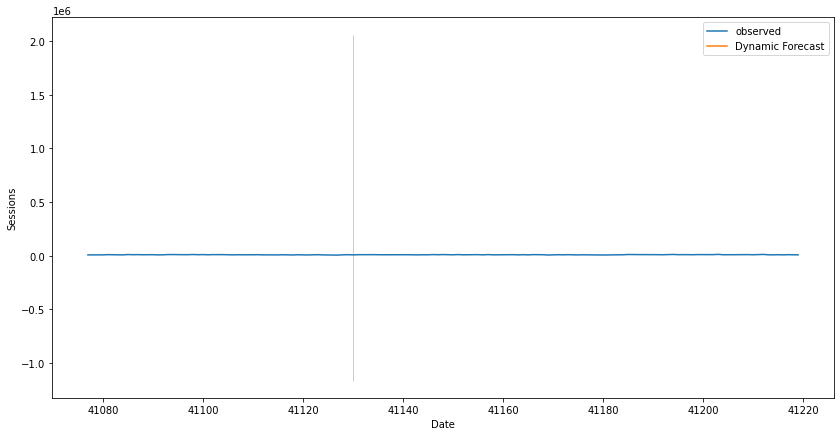

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:1161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


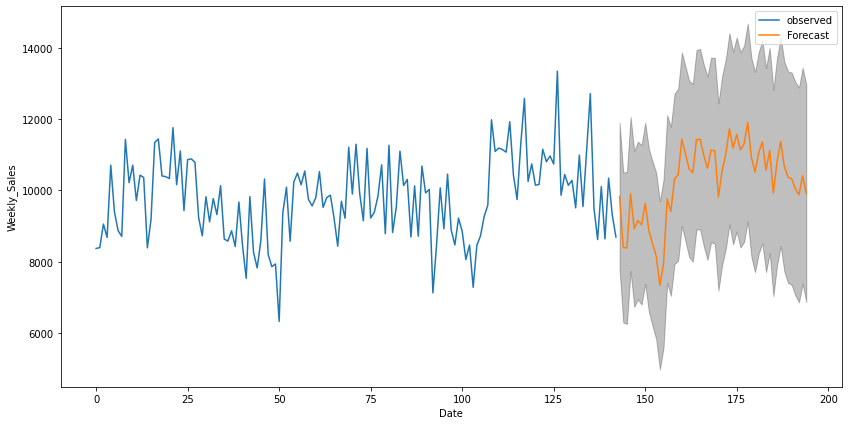

Sales for next year in department 10 in store 5 is 533895.3588121331


In [15]:
'''def SARIMAX_for_each_df(dictionary_of_dataframes):
    
    d = {'store_and_dept': [], 'sales_next_year': []}
    
    for key in dictionary_of_dataframes:
        y = dictionary_of_dataframes[str(key)]['Weekly_Sales']

        y_to_train = y.loc['2010-01-10':'2011-01-04'] # dataset to train
        y_to_test = y.loc['2011-01-04':] # last X months for test  
        predict_date = len(y) - len(y[:'2011-01-04']) # the number of data points for the test set
        
        param_mini, param_seasonal_mini = sarima_grid_search(y,52)
        
        model = sarima_eva(y,param_mini,param_seasonal_mini,52,'2011-01-07',y_to_test)
        
        final_table = forecast(model,52,y)
        
        d['store_and_dept'].append(key)
        d['sales_next_year'].append(final_table['Predicted_Mean'].sum())
        
    forecast_df = pd.DataFrame(d.items())
    return forecast_df'''

def SARIMAX_for_each_department(store, dept):
    
        df_store = sales_df[(sales_df['Store'] == store)]
        df_store_dept = df_store[df_store['Dept'] == dept]
        y = df_store_dept['Weekly_Sales']

        y_to_train = y[0:53] # dataset to train
        y_to_test = y[53:] # last X months for test  
        predict_date = len(y) - len(y[0:53]) # the number of data points for the test set
        
        param_mini, param_seasonal_mini = sarima_grid_search(y,52)
        
        model = sarima_eva(y,param_mini,param_seasonal_mini,52, y.index[53],y_to_test)
        
        final_table = forecast(model,52,y)
        
        print(("Sales for next year in department {} in store {} is {}").format(dept, store, final_table['Predicted_Mean'].sum()))
        
    
SARIMAX_for_each_department(store=5, dept=10)

#print(dict_of_stores)
#print(dict_of_stores['Store_1_Dept_2']['Weekly_Sales'][0:52])

**B. Model the effects of markdowns on holiday weeks**

In [3]:
#Merge the dataset

final_df = sales_df.merge(features_df, how="left", on=['Store', 'Date', 'IsHoliday'])
final_df = final_df.merge(stores_df, how= "left", on=['Store'])
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [4]:
final_df = final_df.fillna(0)

In [5]:
#create dummy variables

final_df = pd.get_dummies(data=final_df, columns=['IsHoliday'])
final_df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,IsHoliday_False,IsHoliday_True
0,1,1,2010-05-02,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,1,0
1,1,1,2010-12-02,46039.49,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,0,1
2,1,1,2010-02-19,41595.55,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,1,0
3,1,1,2010-02-26,19403.54,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,1,0
4,1,1,2010-05-03,21827.90,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,1,0


In [6]:
final_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,IsHoliday_False,IsHoliday_True
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,0.929642,0.070358
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,0.255750,0.255750
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,0.000000,0.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,1.000000,0.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,1.000000,0.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,1.000000,0.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,1.000000,1.000000


In [7]:
final_df.corr()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,IsHoliday_False,IsHoliday_True
Store,1.000000,0.024004,-0.085195,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,0.208552,-0.182881,0.000548,-0.000548
Dept,0.024004,1.000000,0.148032,0.004437,0.003572,0.001494,0.000587,0.001475,0.001937,0.002668,-0.007477,0.007837,-0.002966,-0.000916,0.000916
Weekly_Sales,-0.085195,0.148032,1.000000,-0.002312,-0.000120,0.047172,0.020716,0.038562,0.037467,0.050465,-0.020921,-0.025864,0.243828,-0.012774,0.012774
Temperature,-0.050097,0.004437,-0.002312,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,-0.014752,0.182112,0.096730,-0.058313,0.155949,-0.155949
Fuel_Price,0.065290,0.003572,-0.000120,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,0.215420,-0.164210,-0.033853,0.003361,0.078281,-0.078281
MarkDown1,-0.059844,0.001494,0.047172,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.105168,0.169788,0.003521,-0.003521
MarkDown2,-0.033829,0.000587,0.020716,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.041427,0.078372,-0.207604,0.207604
MarkDown3,-0.020331,0.001475,0.038562,-0.056026,0.018615,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.018078,0.033641,-0.266471,0.266471
MarkDown4,-0.042724,0.001937,0.037467,-0.050281,0.166622,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002047,-0.076513,0.127334,-0.011565,0.011565
MarkDown5,-0.012452,0.002668,0.050465,-0.014752,0.215420,0.415050,0.131735,0.042471,0.303370,1.000000,0.067906,-0.120406,0.153011,0.015235,-0.015235


In [8]:
#Let's create ideal dataset to see great correlation of what effect markdowns have on holiday weeks

#Dataset should likely include only holiday weeks

holiday_df = final_df.loc[(final_df['IsHoliday_True'] == 1)]

#Should include only data where the markdown data is at least viable, which is stated to be after Nov. 2011

holiday_df_past_2011 = holiday_df.loc[(holiday_df['Date'] > pd.Timestamp("2011-11-01 00:00:00", tz=None))]

In [9]:
holiday_df_past_2011 = holiday_df_past_2011.drop(columns=['IsHoliday_False'])

In [10]:
holiday_df_past_2011.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,IsHoliday_True
53,1,1,2011-11-02,37887.17,36.39,3.022,0.00,0.00,0.00,0.00,0.00,212.936705,7.742,A,151315,1
94,1,1,2011-11-25,20911.25,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,A,151315,1
99,1,1,2011-12-30,23350.88,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,7.866,A,151315,1
105,1,1,2012-10-02,36988.49,48.02,3.409,13925.06,6927.23,101.64,8471.88,6886.04,220.265178,7.348,A,151315,1
135,1,1,2012-07-09,18322.37,83.96,3.730,5204.68,35.74,50.94,4120.32,2737.17,222.439015,6.908,A,151315,1


In [11]:
holiday_df_past_2011.shape

(14929, 16)

In [12]:
holiday_df_past_2011.corr()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,IsHoliday_True
Store,1.000000,0.019761,-0.084698,-0.037996,0.104860,-0.090287,-0.120567,-0.105926,-0.058982,-0.073346,-0.212427,0.214299,-0.182265,NaN
Dept,0.019761,1.000000,0.134126,0.002516,0.002779,-0.004052,0.000002,0.003946,-0.000079,0.000985,-0.007221,0.005470,0.001151,NaN
Weekly_Sales,-0.084698,0.134126,1.000000,0.015278,0.020694,0.034997,0.032780,0.148144,0.037041,0.081016,-0.022406,-0.020195,0.222167,NaN
Temperature,-0.037996,0.002516,0.015278,1.000000,0.627241,0.227318,-0.224920,0.024869,-0.100862,0.126302,0.184046,0.025487,-0.061191,NaN
Fuel_Price,0.104860,0.002779,0.020694,0.627241,1.000000,0.439206,-0.211822,0.022292,0.181903,0.334264,-0.323780,0.080650,0.026472,NaN
MarkDown1,-0.090287,-0.004052,0.034997,0.227318,0.439206,1.000000,0.079384,-0.297691,0.728969,0.705031,-0.005390,-0.033840,0.284192,NaN
MarkDown2,-0.120567,0.000002,0.032780,-0.224920,-0.211822,0.079384,1.000000,-0.188046,-0.038449,0.116433,-0.011685,-0.021420,0.214457,NaN
MarkDown3,-0.105926,0.003946,0.148144,0.024869,0.022292,-0.297691,-0.188046,1.000000,-0.221580,-0.099331,-0.044620,-0.025365,0.165714,NaN
MarkDown4,-0.058982,-0.000079,0.037041,-0.100862,0.181903,0.728969,-0.038449,-0.221580,1.000000,0.689368,-0.014064,-0.067094,0.258734,NaN
MarkDown5,-0.073346,0.000985,0.081016,0.126302,0.334264,0.705031,0.116433,-0.099331,0.689368,1.000000,-0.066683,-0.102629,0.337271,NaN


In [13]:
#get rid of isholidayTrue

holiday_df_past_2011 = holiday_df_past_2011.drop(columns=['Date', 'IsHoliday_True'])

#get dummies for Type column

holiday_df_past_2011 = pd.get_dummies(holiday_df_past_2011, columns=['Type'])

In [14]:
holiday_df_past_2011.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
53,1,1,37887.17,36.39,3.022,0.00,0.00,0.00,0.00,0.00,212.936705,7.742,151315,1,0,0
94,1,1,20911.25,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,151315,1,0,0
99,1,1,23350.88,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,7.866,151315,1,0,0
105,1,1,36988.49,48.02,3.409,13925.06,6927.23,101.64,8471.88,6886.04,220.265178,7.348,151315,1,0,0
135,1,1,18322.37,83.96,3.730,5204.68,35.74,50.94,4120.32,2737.17,222.439015,6.908,151315,1,0,0


In [15]:
#Scale it

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
 
holiday_df_scaled = scaler.fit_transform(holiday_df_past_2011[columns for columns in holiday_df_past_2011.columns if columns != 'Weekly_Sales'].to_numpy())
holiday_df_scaled = pd.DataFrame(holiday_df_scaled, columns=[columns for columns in holiday_df_past_2011.columns])

holiday_df_scaled.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
0,-1.656729,-1.421485,0.749162,-0.550310,-1.442393,-0.813149,-0.456653,-0.429706,-0.534451,-1.023639,0.999400,0.026283,0.241321,0.9782,-0.795958,-0.33545
1,-1.656729,-1.421485,0.131332,0.684627,-0.709529,-0.746314,-0.451877,1.642893,-0.532725,-0.823671,1.138430,0.094937,0.241321,0.9782,-0.795958,-0.33545
2,-1.656729,-1.421485,0.220121,-0.126011,-1.075961,0.125426,1.785353,-0.420036,-0.322235,0.682922,1.165286,0.094937,0.241321,0.9782,-0.795958,-0.33545
3,-1.656729,-1.421485,0.716455,0.054419,-0.117074,1.455071,-0.119108,-0.425931,1.293298,1.457779,1.183615,-0.191860,0.241321,0.9782,-0.795958,-0.33545
4,-1.656729,-1.421485,0.037111,1.923205,0.982221,0.034629,-0.454911,-0.427814,0.354479,-0.037286,1.238259,-0.435471,0.241321,0.9782,-0.795958,-0.33545


In [16]:
holiday_df_scaled.corr()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
Store,1.000000,0.019761,-0.084698,-0.037996,0.104860,-0.090287,-0.120567,-0.105926,-0.058982,-0.073346,-0.212427,0.214299,-0.182265,-0.036153,-0.234840,0.439436
Dept,0.019761,1.000000,0.134126,0.002516,0.002779,-0.004052,0.000002,0.003946,-0.000079,0.000985,-0.007221,0.005470,0.001151,0.014550,-0.028606,0.022104
Weekly_Sales,-0.084698,0.134126,1.000000,0.015278,0.020694,0.034997,0.032780,0.148144,0.037041,0.081016,-0.022406,-0.020195,0.222167,0.162690,-0.108449,-0.094464
Temperature,-0.037996,0.002516,0.015278,1.000000,0.627241,0.227318,-0.224920,0.024869,-0.100862,0.126302,0.184046,0.025487,-0.061191,0.008860,-0.091027,0.132412
Fuel_Price,0.104860,0.002779,0.020694,0.627241,1.000000,0.439206,-0.211822,0.022292,0.181903,0.334264,-0.323780,0.080650,0.026472,-0.049075,0.061847,-0.018585
MarkDown1,-0.090287,-0.004052,0.034997,0.227318,0.439206,1.000000,0.079384,-0.297691,0.728969,0.705031,-0.005390,-0.033840,0.284192,0.108395,0.043927,-0.250688
MarkDown2,-0.120567,0.000002,0.032780,-0.224920,-0.211822,0.079384,1.000000,-0.188046,-0.038449,0.116433,-0.011685,-0.021420,0.214457,0.115888,-0.027506,-0.147676
MarkDown3,-0.105926,0.003946,0.148144,0.024869,0.022292,-0.297691,-0.188046,1.000000,-0.221580,-0.099331,-0.044620,-0.025365,0.165714,0.071174,0.015878,-0.143656
MarkDown4,-0.058982,-0.000079,0.037041,-0.100862,0.181903,0.728969,-0.038449,-0.221580,1.000000,0.689368,-0.014064,-0.067094,0.258734,0.147454,-0.041618,-0.177202
MarkDown5,-0.073346,0.000985,0.081016,0.126302,0.334264,0.705031,0.116433,-0.099331,0.689368,1.000000,-0.066683,-0.102629,0.337271,0.204773,-0.065611,-0.233456


In [17]:
#Test for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = holiday_df_scaled.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(holiday_df_scaled.values, i)
                          for i in range(len(holiday_df_scaled.columns))]

print(vif_data)

         feature       VIF
0          Store  1.474112
1           Dept  1.020595
2   Weekly_Sales  1.094308
3    Temperature  3.169452
4     Fuel_Price  3.391936
5      MarkDown1  4.032478
6      MarkDown2  1.363779
7      MarkDown3  1.420070
8      MarkDown4  3.498752
9      MarkDown5  2.639001
10           CPI  1.814630
11  Unemployment  1.163885
12          Size  3.658445
13        Type_A       inf
14        Type_B       inf
15        Type_C       inf


/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [20]:
from sklearn.model_selection import train_test_split

X = holiday_df_scaled[[columns for columns in holiday_df_scaled.columns if columns != 'Weekly_Sales']]
y = holiday_df_scaled['Weekly_Sales']

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)
  
# printing out train and test sets
  
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
          Store      Dept  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
7683   0.063272 -1.421485    -1.323511   -0.644462  -0.813149  -0.456653   
8344   0.141454  1.384433    -1.064044   -0.093102  -0.813149  -0.456653   
10035  0.532364  0.340370    -0.556030   -0.141046  -0.459912   0.379266   
3025  -1.031274  0.470878     0.382003   -0.709529  -0.793347  -0.456653   
4555  -0.640365 -1.323604     0.090298    0.167167  -0.766478  -0.454021   

       MarkDown3  MarkDown4  MarkDown5       CPI  Unemployment      Size  \
7683   -0.429706  -0.534451  -1.023639 -1.003407     -1.428740 -0.361143   
8344   -0.429706  -0.534451  -1.023639 -1.003407      0.308650  1.101301   
10035  -0.427952  -0.462617  -0.377551 -0.918384      0.920446 -0.703389   
3025    1.206710  -0.480983   1.965313  1.230717     -0.908298 -0.176057   
4555    2.890680  -0.531646  -0.333271  0.381375      0.458692  1.053457   

         Type_A    Type_B   Type_C  
7683  -1.022286  1.256348 -0.33545  
8

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


def regressor_results(regressor_list):
    
    lst = []
    
    for regressor in regressor_list:
        
        reg = regressor
        reg.fit(X_train, y_train)

        y_reg_train_pred = reg.predict(X_train)
        y_reg_test_pred = reg.predict(X_test)

        reg_train_mse = mean_squared_error(y_train, y_reg_train_pred)
        reg_train_r2 = r2_score(y_train, y_reg_train_pred)
        reg_test_mse = mean_squared_error(y_test, y_reg_test_pred)
        reg_test_r2 = r2_score(y_test, y_reg_test_pred)
        
        

        lst.append([regressor,reg_train_mse, reg_train_r2, reg_test_mse, reg_test_r2])
        
    result_df = pd.DataFrame(lst, columns = ['Method','Training MSE','Training R2','Test MSE','Test R2'])
    
    print(result_df.head(12))
    
regressor_results([LinearRegression(), RandomForestRegressor(max_depth=2, random_state=42), Ridge(alpha=1.0),
                  SGDRegressor(max_iter=1000, tol=1e-3), ExtraTreesRegressor(n_estimators=100, random_state=0),
                  GradientBoostingRegressor(random_state=0), MLPRegressor(random_state=1, max_iter=500),
                  KNeighborsRegressor(n_neighbors=2), DecisionTreeRegressor(random_state=0),
                  ExtraTreeRegressor(random_state=0), LinearSVR(random_state=0, tol=1e-5), SVR(C=1.0, epsilon=0.2)])

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


                                               Method  Training MSE  \
0                                  LinearRegression()  9.289564e-01   
1   (DecisionTreeRegressor(max_depth=2, max_featur...  7.777605e-01   
2                                             Ridge()  9.289564e-01   
3                                      SGDRegressor()  9.306773e-01   
4   (ExtraTreeRegressor(random_state=209652396), E...  1.985207e-30   
5   ([DecisionTreeRegressor(criterion='friedman_ms...  2.477652e-01   
6          MLPRegressor(max_iter=500, random_state=1)  7.513358e-01   
7                  KNeighborsRegressor(n_neighbors=2)  4.216803e-01   
8               DecisionTreeRegressor(random_state=0)  0.000000e+00   
9                  ExtraTreeRegressor(random_state=0)  0.000000e+00   
10               LinearSVR(random_state=0, tol=1e-05)  1.055336e+00   
11                                   SVR(epsilon=0.2)  8.629615e-01   

    Training R2  Test MSE   Test R2  
0      0.091991  0.869972  0.064166  


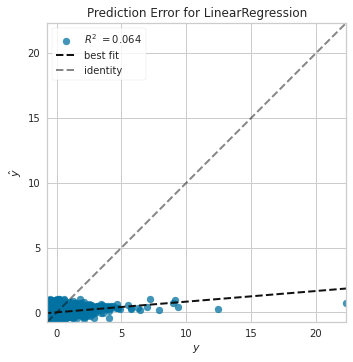

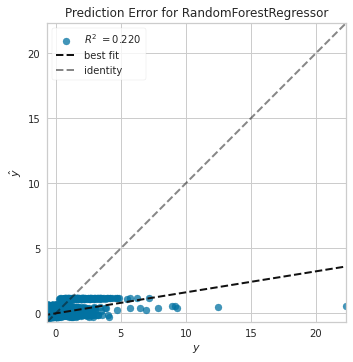

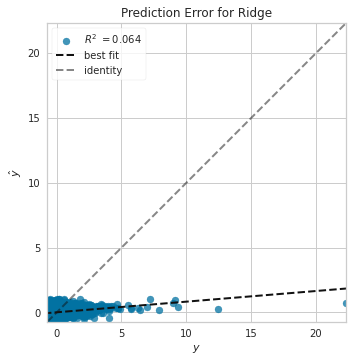

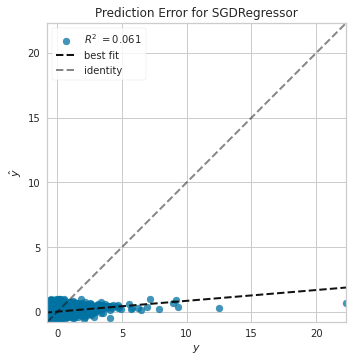

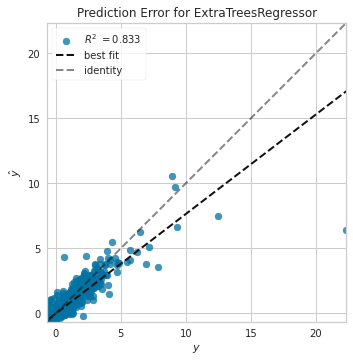

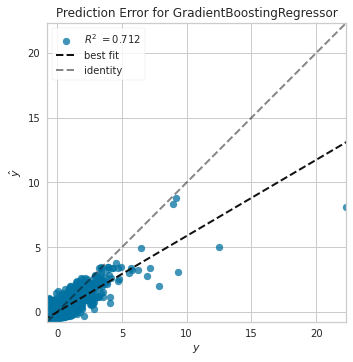

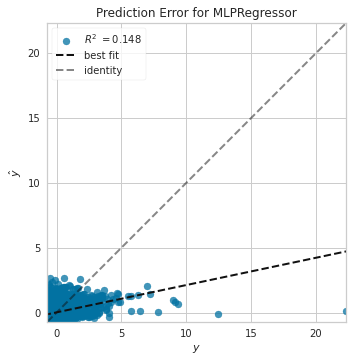

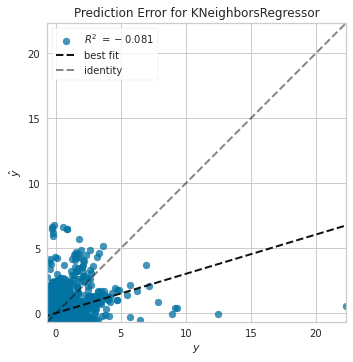

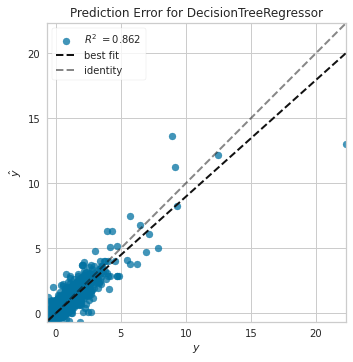

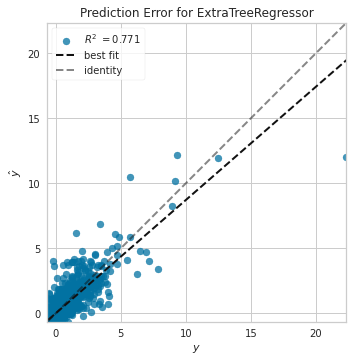

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


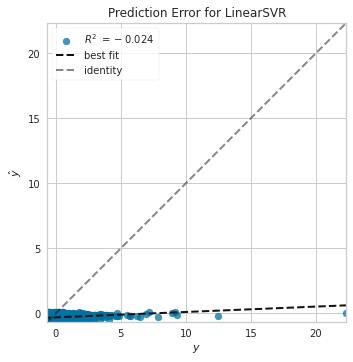

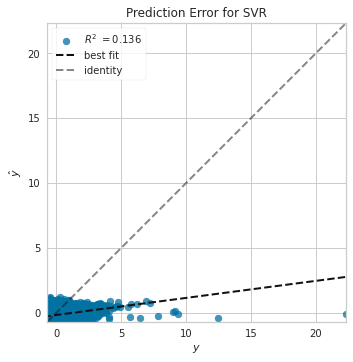

In [22]:
def visualize_results(regressor_list):
    
    for regressor in regressor_list:
        
        from yellowbrick.regressor import PredictionError
        # Instantiate the linear model and visualizer
        reg = regressor
        visualizer = PredictionError(reg) 
        # fit visualizer on training data
        visualizer.fit(X_train, y_train) 
        #Evaluate on test data
        visualizer.score(X_test, y_test)
        #show the plot and save in given path
        visualizer.show()
        
        
visualize_results([LinearRegression(), RandomForestRegressor(max_depth=2, random_state=42), Ridge(alpha=1.0),
                  SGDRegressor(max_iter=1000, tol=1e-3), ExtraTreesRegressor(n_estimators=100, random_state=0),
                  GradientBoostingRegressor(random_state=0), MLPRegressor(random_state=1, max_iter=500),
                  KNeighborsRegressor(n_neighbors=2), DecisionTreeRegressor(random_state=0),
                  ExtraTreeRegressor(random_state=0), LinearSVR(random_state=0, tol=1e-5), SVR(C=1.0, epsilon=0.2)])

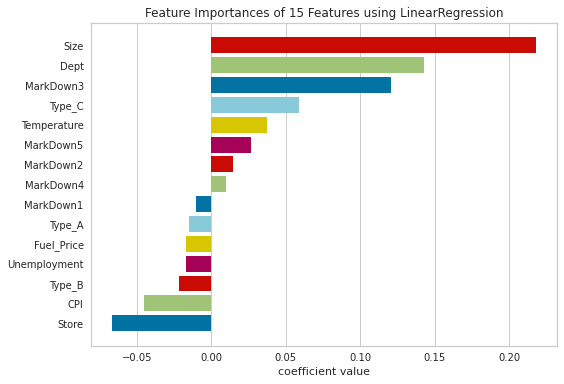

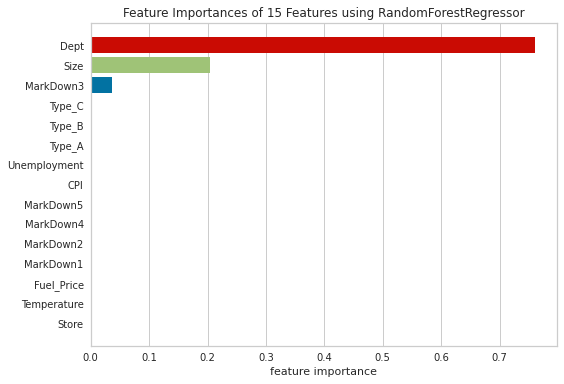

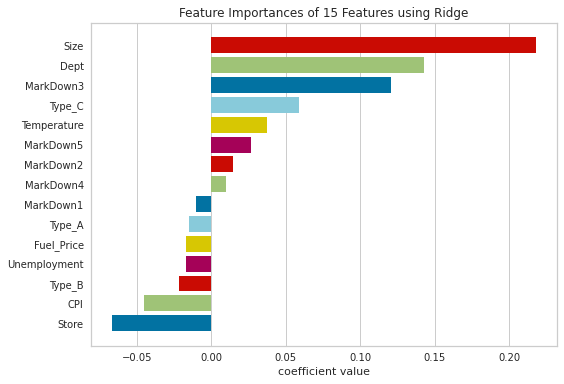

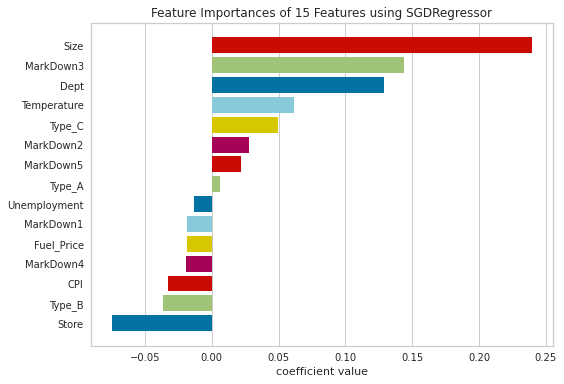

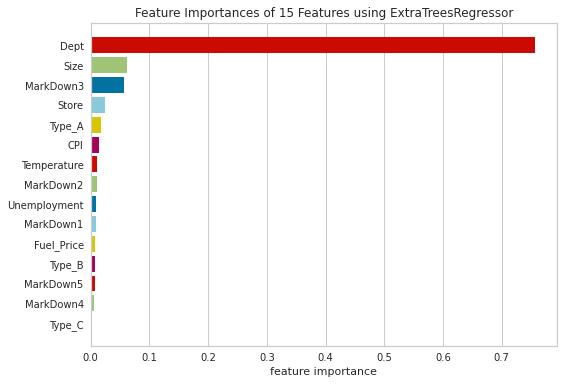

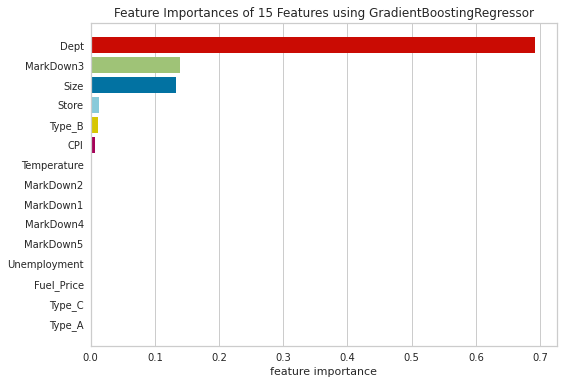

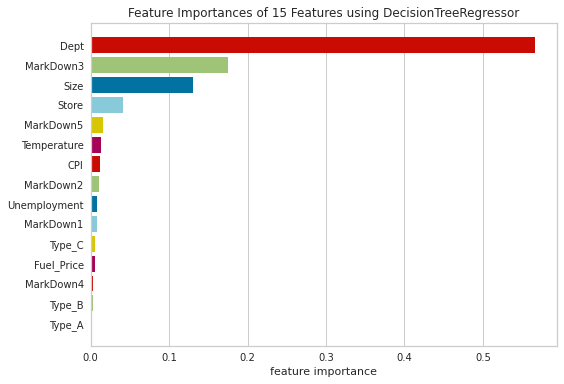

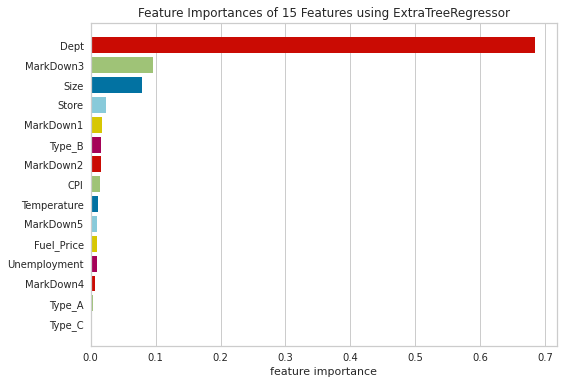

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


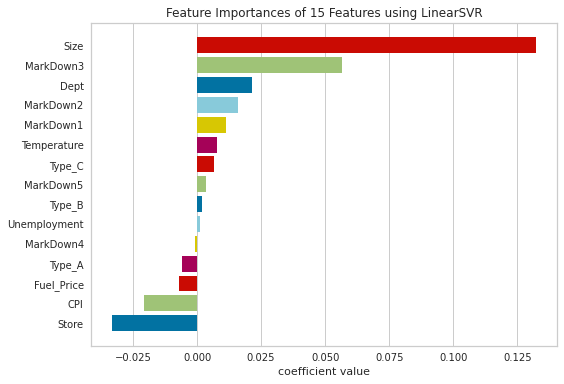

In [23]:
def feature_importance_results(regressor_list):

    for regressor in regressor_list:
        
        from yellowbrick.model_selection import FeatureImportances
        viz = FeatureImportances(regressor,relative=False)
        #fit on train dataset
        viz.fit(X_train, y_train)
        #show plot and save at output path
        viz.show()
        
feature_importance_results([LinearRegression(), RandomForestRegressor(max_depth=2, random_state=42), Ridge(alpha=1.0),
                  SGDRegressor(max_iter=1000, tol=1e-3), ExtraTreesRegressor(n_estimators=100, random_state=0),
                  GradientBoostingRegressor(random_state=0), DecisionTreeRegressor(random_state=0),
                  ExtraTreeRegressor(random_state=0), LinearSVR(random_state=0, tol=1e-5)])

#MLPRegressor(random_state=1, max_iter=500), KNeighborsRegressor(n_neighbors=2), , SVR(C=1.0, epsilon=0.2)

In [38]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(predictions)
print(y_test)
correct_predictions = np.nonzero(np.array(predictions) == np.array(y_test))[0]
incorrect_predictions = np.nonzero(np.array(predictions) != np.array(y_test))[0]
print(len(correct_predictions)," classified correctly")
print(len(incorrect_predictions)," classified incorrectly")

[-0.60504677 -0.62961414  0.92212057 ... -0.61700746 -0.25695423
 -0.60242018]
6450    -0.527163
7550    -0.628966
3158     1.125292
14387   -0.591639
2180    -0.581866
           ...   
10370    0.483575
12886   -0.011869
12134   -0.621285
3942     0.063815
14409   -0.589740
Name: Weekly_Sales, Length: 3733, dtype: float64
7  classified correctly
3726  classified incorrectly
